In [ ]:
"""
Purpose: To Run the neuron preprocessing


"""

In [1]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2020-12-06 19:26:23,496 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-12-06 19:26:23,498 - settings - Setting database.user to celiib
INFO - 2020-12-06 19:26:23,499 - settings - Setting database.password to newceliipass
INFO - 2020-12-06 19:26:23,503 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-12-06 19:26:23,504 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-06 19:26:23,514 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2020-12-06 19:26:23,712 - settings - Setting enable_python_native_blobs to True


# configuring the virtual module

In [2]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 30)
print(f"Sleeping {random_sleep_sec} sec before conneting")
#time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2020-12-06 19:26:23,730 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-12-06 19:26:23,732 - settings - Setting database.user to celiib
INFO - 2020-12-06 19:26:23,733 - settings - Setting database.password to newceliipass
INFO - 2020-12-06 19:26:23,734 - settings - Setting enable_python_native_blobs to True
INFO - 2020-12-06 19:26:23,921 - settings - Setting enable_python_native_blobs to True


Sleeping 20 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


# Defining Our Table

In [3]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [4]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 7933


In [5]:
#so that it will have the adapter defined
from datajoint_utils import *

# Segment_id we are currently checking

In [6]:
segment_id=864691136535575714

# Checking the Table

In [7]:
#minnie.Decomposition()

In [8]:
minnie.Decimation() & dict(segment_id=segment_id)

segment_id segment id unique within each Segmentation,version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),n_vertices,n_faces,mesh in-place path to the hdf5 (decimated) mesh file
864691136535575714,0,0.10,314807,622049,=BLOB=
864691136535575714,0,0.25,781389,1555047,=BLOB=


In [ ]:
import neuron_visualizations as nviz
du.plot_decimated_mesh_with_somas(segment_id)

In [23]:
curr_faces = [10,13,15,20]
current_mesh = current_neuron_mesh

vertices = current_mesh.faces[curr_faces]
vertices


TrackedArray([[397511, 323612, 278846],
              [586359, 195786, 511384],
              [757237, 278846, 714492],
              [509273, 586359, 577084]])

In [ ]:
def vertices_to_faces(current_mesh,vertices,
                     concatenate_unique_list=False):
    """
    Purpose: If have a list of vertex indices, to get the face indices associated with them
    """
    try:
        vertices = np.array(vertices)
        intermediate_face_list = current_mesh.vertex_faces[vertices]
        
        ndim = vertices.ndim
        
        if ndim == 1:
            faces_list = [k[k!=-1] for k in intermediate_face_list]
            if concatenate_unique_list:
                return np.unique(np.concatenate(faces_list))
            else:
                return faces_list
        elif ndim == 2:
            """
            Pseudocode:
            1) Iterate through first dim (usually correspondning to a face mapped to it's vertices)
            2) Convert the vertices for each face to the faces corresponding to that vertex
            3) Filter out any of the -1
            """
            
        else:
            raise Exception("The vertices to faces is not supported for greater than 2 dimensions")
    except:
        print(f"vertices = {vertices}")
        su.compressed_pickle(current_mesh,"current_mesh_error_v_to_f")
        su.compressed_pickle(vertices,"vertices_error_v_to_f")
        raise Exception("Something went wrong in vertices to faces")

In [32]:
vertices.ndim
vertices.ravel().ndim

1

In [26]:
faces_to_vertex_faces = current_mesh.vertex_faces[vertices]
faces_to_vertex_faces.shape

(4, 3, 23)

In [28]:
for k in faces_to_vertex_faces:
    for j in k:
        
    print("---")

[[10  9  7  3  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [19 18 12 11 10  4  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [16 15 11 10  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]
---
[[22 21 20 13  6  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [13  8  7  6  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [23 22 14 13  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]
---
[[ 15  14   9   8   7  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1  -1]
 [ 16  15  11  10   9  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1  -1]
 [202  25  24  23  16  15  14  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1  -1]]
---
[[ 20  12   5   4  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1  -1]
 [ 22  21  20  13   6   5  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
   -1  -1  -1  -1  -1]
 [200  21  20  19  12  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -

# Debugging the neuron creation

In [35]:
#1) Get the segment id from the key
description = "0_25"
print(f"\n\n----- Working on {segment_id}-------")
global_start = time.time()

#2) Get the decimated mesh
current_neuron_mesh = du.fetch_segment_id_mesh(segment_id)

#3) Get the somas info *************************** Need to change this when actually run *******************
somas = du.get_soma_mesh_list(segment_id) 
print(f"somas = {somas}")
#4) Run the preprocessing


total_neuron_process_time = time.time()



----- Working on 864691136535575714-------
somas = [[<trimesh.Trimesh(vertices.shape=(23444, 3), faces.shape=(46516, 3))>], array([641.1727]), array([0.849])]


In [42]:
import preprocessing_vp2 as pre
import soma_extraction_utils as sm
import skeleton_utils as sk

import neuron
tu = reload(tu)
du = reload(du)
sm = reload(sm)
pre = reload(pre)
import compartment_utils as cu
cu = reload(cu)
sk= reload(sk)

neuron = reload(neuron)
print(f"\n--- Beginning preprocessing of {segment_id}---")
recovered_neuron = neuron.Neuron(
mesh = current_neuron_mesh,
somas = somas,
segment_id=segment_id,
description=description,
suppress_preprocessing_print=False,
suppress_output=False,
calculate_spines=True,
widths_to_calculate=["no_spine_median_mesh_center"]

        )


--- Beginning preprocessing of 864691136535575714---
--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(23444, 3), faces.shape=(46516, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(23444, 3), faces.shape=(46516, 3))>]
soma_mesh_list_centers = [array([1329540.13862822,  476301.83616277,  701847.28207217])]
xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/neuron_45052.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/neuron_45052_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/remove_interior_485610.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/neuron_45052.off
removed temporary output file: /notebooks/Platinum_Da

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:14<00:00, 14.58s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 17.942239999771118
connecting at the root
branches_touching_root = [105]
length of Graph = 28055
Working on path [23222. 23230. 23241. 23242.]
path_degrees = [3, 2, 2, 3]
Working on path [28055. 23229. 23237. 23246. 23249.]
path_degrees = [4, 2, 2, 2, 3]
Working on path [28056. 23256. 23266. 23270. 23277. 23284.]
path_degrees = [5, 2, 2, 2, 2, 3]
Working on path [27721. 27736. 27748. 27751.]
path_degrees = [3, 2, 2, 3]
max(kept_branches_idx) = 105, len(kept_branches_idx) = 102
empty_indices % = 0.0
 conflict_indices % = 0.006570452720678363



AFTER face_lookup_resolved_test



Decomposing first pass: 37.18369150161743
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [11754, 15609, 14004, 974, 5693, 1590, 232, 7344, 3340, 5109, 373, 752, 7436, 14559, 15169, 4017, 14527, 396, 1173, 4902, 1014, 6928, 11191, 1136, 420, 10912, 14818, 37647, 16008, 8293, 15163, 13954, 3785, 7116, 1843, 8488, 14244, 1365, 4217, 33462, 22142, 43018, 14028, 19864, 2574, 1037, 19879, 26941, 2105, 9577, 19215, 9915, 6651, 5016, 3667]
mesh_large_connectivity: 2.3287813663482666
Finding MAP candidates connected components: 0.0005486011505126953
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.595308780670166
Grouping MP Sublimbs by Graph: 0.14986157417297363
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.03437304496765137
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting S


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.08411312103271484
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
node_degrees = [3 4 3 2]
    Total time for skeletonizing branch: 222.01356983184814
Checking connected components after removing cycles
Total time for mesh KDTree = 3.1625125408172607
sbv[0].reshape(-1,3) = [[1330574.   482818.   708844.2]]
closest_sk_pt_coord BEFORE = [1333340.  487057.  712973.]
current_skeleton.shape = (1808, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1333340.  487057.  712973.]
skipping soma 0 because closest skeleton node was already end node
sbv[0].reshape(-1,3) = [[1333479.  467292.  701484.]]
closest_sk_pt_coord BEFORE = [1332950.  465996.  701924.]
current_skeleton.shape = (1808, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1608, 2, 3)
high-degree endpoints were connected so just using that connection
curr_branch = {1489.0, 1483}
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 230.3520073890686
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 1106.425712108612
mesh_correspondence_first_pass: 1106.4257435798645
Limb decomposed into 152 branches
divided_skeleton_graph_recovered = (1605, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1605, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (151, 152)
empty_indices % = 0.20943333271544293
 conflict_indices % = 0.09097262127643799



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 1424.580489397049
correspondence_1_to_1: 87.76819038391113
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.0019402503967285156
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/poisson_931050.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/neuro


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.02294921875
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.538196086883545
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.0027620792388916016
filter_end_node_length = 1500
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (44, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 7.608477830886841
Working on limb correspondence for #1 MAP piece



Total time for decomposition = 1.1411757469177246
mesh_correspondence_first_pass: 1.141209363937378
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (44, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (44, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.13322091062394603
 conflict_indices % = 0.08754918493535695



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 15.07742953300476
correspondence_1_to_1: 6.325869798660278
Total time for MAP sublimb processing 1439.658434867859
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.007145881652832031
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.010452508926391602
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.001028299331665039
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.00042438507080078125
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition #




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.07088562842496023
 conflict_indices % = 0.05521183194861823



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
Current stitch point was a branch or endpoint
sk_conn = [4, 15]
conn = [4, 15]
winning_vertex = [1339255.6272583   491423.94072628  718471.07758653]
MP_branches_with_stitch_point = [4, 15]
MAP_branches_with_stitch_point = [66, 81, 109]
MAP_stitch_point_on_end_or_branch = True
Using max stitch distance (300) for smoothing because stitch_distance greater (1235.0840993478225) 
Found winning edge: [9, 10.0]
in remove edge
Using max stitch distance (300) for smoothing because stitch_distance greater (1174.1598039148316) 
Found winning edge: [0, 3.0]
in remove edge

Revising the MAP pieces index:
MAP_pieces_idx_touching_border = [81], MAP_branches_with_stitch_point = [66, 81, 109]
MAP_pieces_for_correspondence = [81]





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.17784181876400895
 conflict_indices % = 0.019489806809691534



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [4, 15]
MP_branches_for_correspondence = [ 4 15]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1211977.8407634   377923.53116462  743236.30257789]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Using max stitch distance (300) for smoothing because stitch_distance greater (3039.4191008637545) 
Found winning edge: [133, 134.0]
in remove edge
Using max stitch distance (300) for smoothing because stitch_distance greater (3024.4059776027925) 
Found winning edge: [9, 10.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07079598228750406
 conflict_indices % = 0.0023760665298628364



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 4108.269468522696
sk_conn = [0]
conn = [0]
winning_vertex = [1347576.83959648  482330.67248632  731362.05545085]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [109]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (395.4480284482131) 
Found winning edge: [9, 10.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.3295034079844206
 conflict_indices % = 0.018111002921129504



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2981070204203309
 conflict_indices % = 0.10001490535102102



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 7598.331535117541
sk_conn = [0]
conn = [0]
winning_vertex = [1304607.48986534  386774.53728884  616593.35320236]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [30]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (1392.4265600360895) 
Found winning edge: [226, 227.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.4224028637482288
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.30196120230228096
 conflict_indices % = 0.011991046685141761



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 0) 




---- Working on (5, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 7144.160279143285
sk_conn = [0]
conn = [0]
winning_vertex = [1333082.6013069   425462.65970914  630776.44544849]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [73]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [453, 454.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.054291591348251574
 conflict_indices % = 0.0013713145920339089



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07480505141122076
 conflict_indices % = 0.02784486922917673



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 0) 




---- Working on (6, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 5212.519648274996
sk_conn = [2]
conn = [2]
winning_vertex = [1343786.34140885  447151.51556893  687376.78580312]
MP_branches_with_stitch_point = [2]
MAP_branches_with_stitch_point = [108]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (483.59560062036206) 
Found winning edge: [9, 10.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.17863296955772545
 conflict_indices % = 0.0015316867700555237



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16638731041249336
 conflict_indices % = 0.03487183680143902



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [2]
MP_branches_for_correspondence = [2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 0) 




---- Working on (7, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 651.0601987675209
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1344702.1127263   509908.04190858  787113.93046494]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [119]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (578.0374766820029) 
Found winning edge: [265, 266.0]
in remove edge
Using max stitch distance (300) for smoothing because stitch_distance greater (509.8512657981354) 
Found winning edge: [9, 10.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.5986270022883295
 conflict_indices % = 0.04851258581235698



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.1816505706760316
 conflict_indices % = 0.049341527655838456



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (7, 0) 




---- Working on (8, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 26308.534917557532
sk_conn = [0]
conn = [0]
winning_vertex = [1294744.10695637  391327.0391975   708852.03885889]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [20]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (492.9203705552628) 
Found winning edge: [237, 239.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.32699905926622763
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.221846023623562
 conflict_indices % = 0.022238467161709824



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (8, 0) 




---- Working on (9, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 13546.253907192442
sk_conn = [0]
conn = [0]
winning_vertex = [1333846.25484713  492766.74522079  731998.87191404]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [66]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (716.6275099240505) 
Found winning edge: [403, 404.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.4651826484018265
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.14800020616431295
 conflict_indices % = 0.011751365838573342



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (9, 0) 




---- Working on (10, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 8033.757651401496
sk_conn = [0]
conn = [0]
winning_vertex = [1334214.25996574  437825.88700424  698282.20841658]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [72]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (1088.418562713957) 
Found winning edge: [60, 61.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1613486842105263
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.049268358168881726
 conflict_indices % = 0.03691770707477514



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (10, 0) 




---- Working on (11, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 17261.46369735091
sk_conn = [0]
conn = [0]
winning_vertex = [1347958.01978104  505071.77347747  766277.50807283]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [117]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (482.0540114114832) 
Found winning edge: [9, 10.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.22526677518538615
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.23807949756218494
 conflict_indices % = 0.0019833071646971324



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (11, 0) 




---- Working on (12, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 6757.7206210482545
sk_conn = [0]
conn = [0]
winning_vertex = [1331254.0437132   492701.75668474  727295.50666541]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [66]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (1017.8722176788939) 
Found winning edge: [9, 10.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.5728940619451568
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.15892135529996892
 conflict_indices % = 0.025761579110972956



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (12, 0) 




---- Working on (13, 0) connection-----
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1354555.88463727  479751.95664937  743401.52968142]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [128]
MAP_stitch_point_on_end_or_branch = True
Using max stitch distance (300) for smoothing because stitch_distance greater (3135.1642406812425) 
Found winning edge: [9, 10.0]
in remove edge
Using max stitch distance (300) for smoothing because stitch_distance greater (3120.652677246873) 
Found winning edge: [9, 10.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16287164003857926
 conflict_indices % = 0.021176667924686542



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (13, 0) 




---- Working on (14, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 2284.3662140733913
sk_conn = [0]
conn = [0]
winning_vertex = [1349948.11235355  480789.10525443  736462.49395124]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [128]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [8, 9.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.5633354551241248
 conflict_indices % = 0.005092297899427116



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16917524865768857
 conflict_indices % = 0.02042073761112578



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (14, 0) 




---- Working on (15, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1045.700243855762
sk_conn = [0]
conn = [0]
winning_vertex = [1328104.58384019  421582.14829114  696520.63134049]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [64]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (827.2186756058792) 
Found winning edge: [42, 43.0]
in remove edge


empty mesh_correspondence_indices_2 returned so returning original mesh correspondence



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.12155963302752294
 conflict_indices % = 0.03669724770642202



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.12932226832641772
 conflict_indices % = 0.05705394190871369



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (15, 0) 




---- Working on (16, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 11622.246004602192
sk_conn = [0]
conn = [0]
winning_vertex = [1346010.28032551  412980.15933569  603813.46875168]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [115]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (412.2102312811051) 
Found winning edge: [9, 10.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.08267882187938289
 conflict_indices % = 0.00028050490883590464



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09735353797003843
 conflict_indices % = 0.04606484479557916



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (16, 0) 




---- Working on (17, 0) connection-----
Current stitch point was a branch or endpoint
sk_conn = [0]
conn = [0]
winning_vertex = [1318346.99597773  393309.01848124  657889.0297461 ]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [45, 49, 55]
MAP_stitch_point_on_end_or_branch = True
Using max stitch distance (300) for smoothing because stitch_distance greater (1508.7860796665045) 
Found winning edge: [64, 66.0]
in remove edge

Revising the MAP pieces index:
MAP_pieces_idx_touching_border = [55], MAP_branches_with_stitch_point = [45, 49, 55]
MAP_pieces_for_correspondence = [55]





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.4242565055762082
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (17, 0) 




---- Working on (18, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 20778.802220615173
sk_conn = [0]
conn = [0]
winning_vertex = [1255169.98049962  372620.39628974  726696.30954403]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [6]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (983.6157840191961) 
Found winning edge: [68, 70.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.18366045489973784
 conflict_indices % = 0.0021256997094877064



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1689607932676626
 conflict_indices % = 0.013308108813360298



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (18, 0) 




---- Working on (6, 1) connection-----
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1375237.08023719  468920.64116188  698840.78173452]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Using max stitch distance (300) for smoothing because stitch_distance greater (940.6240681524305) 
Found winning edge: [34, 36.0]
in remove edge
Using max stitch distance (300) for smoothing because stitch_distance greater (984.6247211153233) 
Found winning edge: [109, 110.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06222439980401764
 conflict_indices % = 0.015801077902988733



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 1) 



Time for decomp of Limb = 1630.3068480491638
Number of matching vertices = 49
Number of matching vertices = 0
Number of matching vertices = 0
Number of matching vertices = 78
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
root_curr = [1321526.   476625.5  704150.5]
Time for preparing soma vertices and root: 0.00018167495727539062
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 2.471602201461792
branches_touching_root = [5]
length of Graph = 9101
max(kept_branches_idx) = 24, len(kept_branches_idx) = 25
empty_indices % = 0.0
 conflict_indices % = 0.004394878149524989



AFTER face_lookup_resolved_test



Decomposing first pass: 16.52951693534851
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [10169, 8016, 2592, 122, 2934, 1424, 1618, 27556, 2095, 20584, 30433, 419, 27159, 23035, 12141, 10933, 17612]
mesh_large_connectivity: 0.25154709815979004
Finding MAP candidates connected components: 0.0002243518829345703
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.1673119068145752
Grouping MP Sublimbs by Graph: 0.02400827407836914
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.016526222229003906
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None_poisson.


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.0646519660949707
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
node_degrees = [3 3 3]
    Total time for skeletonizing branch: 56.68938636779785
Checking connected components after removing cycles
Total time for mesh KDTree = 1.141021966934204
sbv[0].reshape(-1,3) = [[1321526.   476625.5  704150.5]]
closest_sk_pt_coord BEFORE = [1318370.  475273.  704610.]
current_skeleton.shape = (1399, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1318370.  475273.  704610.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1318370.,  475273.,  704610.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 1.6355865001678467
filter_end_node_length = 1500
Using Distance measure skeletal_distance
endpoints_must_keep = [[1318370.  4752


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1132, 2, 3)
high-degree endpoints were connected so just using that connection
curr_branch = {257}
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 61.51423645019531
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 125.26970052719116
mesh_correspondence_first_pass: 125.26972818374634
Limb decomposed into 40 branches
divided_skeleton_graph_recovered = (1130, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1130, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (39, 40)
empty_indices % = 0.09009163054083141
 conflict_indices % = 0.05803602860562658



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 204.7930977344513
correspondence_1_to_1: 17.992587566375732
Total time for MAP sublimb processing 204.79325437545776
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0018754005432128906
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0014786720275878906
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.00197601318359375
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1290094.




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0940157227659233
 conflict_indices % = 0.01933258463019413



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 5602.086758974208
sk_conn = [0]
conn = [0]
winning_vertex = [1299848.90384372  483202.79139083  713282.68764362]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (337.41156529267545) 
Found winning edge: [615, 617.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.11883026458301099
 conflict_indices % = 0.0007736345350456444



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.10708836438299395
 conflict_indices % = 0.014090078550304218



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1998.3021111736457
sk_conn = [1]
conn = [1]
winning_vertex = [1298268.47231884  483267.22589807  713742.19832957]
MP_branches_with_stitch_point = [1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (806.523038159057) 
Found winning edge: [523, 524.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.11139779397535961
 conflict_indices % = 0.0011288137779784557



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09616556768437967
 conflict_indices % = 0.006981769823239319



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]


Deleting branches from dictionary
MP_branches_with_stitch_point= [1]
MP_branches_for_correspondence = [1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 266.0580005645752
Number of matching vertices = 42
Only one endpoint after filtering away the endpoints that are not on the skeleton


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
root_curr = [1330791.   475659.9  693399. ]
Time for preparing soma vertices and root: 0.0005815029144287109
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.2969844341278076
branches_touching_root = [3]
length of Graph = 4641
max(kept_branches_idx) = 14, len(kept_branches_idx) = 15
empty_indices % = 0.0
 conflict_indices % = 0.005184918007445671



AFTER face_lookup_resolved_test



Decomposing first pass: 5.683371543884277
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [9409, 4886, 2302, 6185, 2090, 15682, 6799, 30016, 28528, 15076]
mesh_large_connectivity: 0.08814001083374023
Finding MAP candidates connected components: 0.00018930435180664062
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.07154011726379395
Grouping MP Sublimbs by Graph: 0.01822376251220703
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0068395137786865234
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_P


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.04731106758117676
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
node_degrees = [4 2 3 2 3]
node_degrees = [3 4 3]
    Total time for skeletonizing branch: 48.19145321846008
Checking connected components after removing cycles
Total time for mesh KDTree = 0.6133368015289307
sbv[0].reshape(-1,3) = [[1330791.   475659.9  693399. ]]
closest_sk_pt_coord BEFORE = [1332560.  475709.  692463.]
current_skeleton.shape = (827, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1332560.  475709.  692463.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1332560.,  475709.,  692463.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.8883304595947266
filter_end_node_length = 1500
Using Distance measure skeletal_distance
endpoints_


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (691, 2, 3)
high-degree endpoints were connected so just using that connection
curr_branch = {329}
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 1 valid paths to replace
valid_paths = [array([525., 527., 529.])]
valid_path_lengths = [570.4255266844515]
length of Graph = 689
Working on path [525. 527. 529.]
path_degrees = [3, 2, 3]
skeletonize_and_clean_connected_branch_CGAL: 50.4210262298584
Working on limb correspondence for #0 MAP piece
type(branch_subgraph) = <class 'networkx_utils.GraphOrderedEdges'>
in remove edge



Total time for decomposition = 48.749364137649536
mesh_correspondence_first_pass: 48.74939489364624
Limb decomposed into 27 branches
divided_skeleton_graph_recovered = (686, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (687, 2, 3)

****divided_skeleton_graph_recovered and cleaned_limb_skeleton shapes not match: (686, 2, 3) vs. (687, 2, 3) *****
Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (26, 27)
empty_indices % = 0.10017000503366859
 conflict_indices % = 0.046043821409237254



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 104.8103380203247
correspondence_1_to_1: 5.6330406665802
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.0009655952453613281
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/poisson_311531.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/neuron_


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.0240018367767334
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 10.158513307571411
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.006208181381225586
filter_end_node_length = 1500
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (93, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 10.280503749847412
Working on limb correspondence for #1 MAP piece



Total time for decomposition = 1.6598138809204102
mesh_correspondence_first_pass: 1.659855604171753
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (93, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (93, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.10056115291416912
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 12.400830745697021
correspondence_1_to_1: 0.4594452381134033
Total time for MAP sublimb processing 117.21151161193848
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0033135414123535156
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.003286600112915039
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0026166439056396484
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 607.9161459616788
sk




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.14888079125455492
 conflict_indices % = 0.05674128058302967



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.14670281175135544
 conflict_indices % = 0.02036313201361745



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 17725.762229643766
sk_conn = [0]
conn = [0]
winning_vertex = [1352252.5077901   460098.92182502  659634.67164876]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [10]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (525.6163083059668) 
Found winning edge: [9, 10.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1075031525851198
 conflict_indices % = 0.0027742749054224464



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09986724595703596
 conflict_indices % = 0.025796524257784215



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 13365.548925559611
sk_conn = [0]
conn = [0]
winning_vertex = [1349775.02784622  449446.64128244  647746.47921947]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [28]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (424.31092321631246) 
Found winning edge: [9, 10.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.11451962911816926
 conflict_indices % = 0.0019727756954034327



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.11079301460062983
 conflict_indices % = 0.03588128638228839



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (2, 1) connection-----
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1351131.22828945  449933.62297746  648014.94680805]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Using max stitch distance (300) for smoothing because stitch_distance greater (676.992165854215) 
Using max stitch distance (300) for smoothing because stitch_distance greater (667.8524135297547) 
Found winning edge: [34, 36.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1527388397670908
 conflict_indices % = 0.019193444037092947



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]


MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 1) 



Time for decomp of Limb = 152.11721014976501
Number of matching vertices = 41
Only one endpoint after filtering away the endpoints that are not on the skeleton


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
root_curr = [1322669.   477330.   696743.2]
Time for preparing soma vertices and root: 0.0002677440643310547
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.2626538276672363
branches_touching_root = [2]
length of Graph = 4706
max(kept_branches_idx) = 14, len(kept_branches_idx) = 15
empty_indices % = 0.0
 conflict_indices % = 0.005465889054658891



AFTER face_lookup_resolved_test



Decomposing first pass: 5.472896099090576
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [3403, 4715, 14112, 4499, 223, 2334, 3293, 23118, 2911, 11231]
mesh_large_connectivity: 0.05855298042297363
Finding MAP candidates connected components: 0.0001499652862548828
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.11888289451599121
Grouping MP Sublimbs by Graph: 0.03541707992553711
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.00520634651184082
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Pro


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.03416919708251953
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 34.070624113082886
Checking connected components after removing cycles
Total time for mesh KDTree = 0.42008185386657715
sbv[0].reshape(-1,3) = [[1322669.   477330.   696743.2]]
closest_sk_pt_coord BEFORE = [1322180.  478440.  696126.]
current_skeleton.shape = (504, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1322180.  478440.  696126.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1322180.,  478440.,  696126.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.5930032730102539
filter_end_node_length = 1500
Using Distance measure skeletal_distance
endpoints_must_keep = [[1322180.  478440.  696126.]]
Numbe


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (397, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 35.288512229919434
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 30.104358196258545
mesh_correspondence_first_pass: 30.104387521743774
Limb decomposed into 24 branches
divided_skeleton_graph_recovered = (397, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (397, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (23, 24)
empty_indices % = 0.07793639656925214
 conflict_indices % = 0.0792393934621057



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 69.40247631072998
correspondence_1_to_1: 4.004368782043457
Total time for MAP sublimb processing 69.40260410308838
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0018360614776611328
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.003683805465698242
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0003986358642578125
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0010907649993896484
Do Not Need to Fix MP Decomposition 3 so just continuing
Successful mesh connectivity with




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.02224824355971897
 conflict_indices % = 0.017759562841530054



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06511066619127287
 conflict_indices % = 0.018183812841117905



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1312424.03925485  486636.00097855  667588.96609715]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [22]
MAP_stitch_point_on_end_or_branch = True
Using max stitch distance (300) for smoothing because stitch_distance greater (427.96268062241734) 
Found winning edge: [464, 466.0]
in remove edge
Using max stitch distance (300) for smoothing because stitch_distance greater (359.5584966031202) 
Found winning edge: [471, 472.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1163283552435511
 conflict_indices % = 0.016788635385277657



AFTER face_lookup_resolved_test



MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 2893.3982091382964
sk_conn = [0]
conn = [0]
winning_vertex = [1303204.30033668  482521.11157477  686545.83704349]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [19]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (540.766746218261) 
Found winning edge: [86, 88.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.0013831258644536654
 conflict_indices % = 0.007952973720608575



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0007960199004975124
 conflict_indices % = 0.15940298507462686



AFTER face_lookup_resolved_test



Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 6923.210644104682
sk_conn = [0]
conn = [0]
winning_vertex = [1293479.19571636  483642.75740905  684730.09926961]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [15]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (607.0479786057919) 
Found winning edge: [472, 473.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1237938821597208
 conflict_indices % = 0.005337712995278177



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09425196461226709
 conflict_indices % = 0.03212573518509366



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]


Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 



Time for decomp of Limb = 107.90401673316956
Number of matching vertices = 38
Only one endpoint after filtering away the endpoints that are not on the skeleton


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
root_curr = [1334932.   480500.8  697477.1]
Time for preparing soma vertices and root: 0.0001938343048095703
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.5790266990661621
connecting at the root
branches_touching_root = [4]
length of Graph = 2241
max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.002755085256867153



AFTER face_lookup_resolved_test



Decomposing first pass: 2.6109414100646973
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [14535, 20729, 21330, 1946]
mesh_large_connectivity: 0.02698969841003418
Finding MAP candidates connected components: 0.00010251998901367188
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.028908491134643555
Grouping MP Sublimbs by Graph: 0.0070497989654541016
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.006418704986572266
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/poisson_8


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.03526806831359863
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 28.390305757522583
Checking connected components after removing cycles
Total time for mesh KDTree = 0.349794864654541
sbv[0].reshape(-1,3) = [[1334932.   480500.8  697477.1]]
closest_sk_pt_coord BEFORE = [1335440.  480731.  696443.]
current_skeleton.shape = (482, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1335440.  480731.  696443.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1335440.,  480731.,  696443.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.507390022277832
filter_end_node_length = 1500
Using Distance measure skeletal_distance
endpoints_must_keep = [[1335440.  480731.  696443.]]
Number o


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (405, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 29.40453791618347
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 13.901256084442139
mesh_correspondence_first_pass: 13.90128779411316
Limb decomposed into 11 branches
divided_skeleton_graph_recovered = (405, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (405, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (10, 11)
empty_indices % = 0.09014349162965493
 conflict_indices % = 0.02471814144174923



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 52.26242733001709
correspondence_1_to_1: 8.950092077255249
Total time for MAP sublimb processing 52.26272392272949
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0012786388397216797
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 34925.679664871954
sk_conn = [0]
conn = [0]
winning_vertex = [1344320.88765463  492337.28006837  654476.77393805]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (482.2514686163795) 
Found winning edge: [9, 10.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.07990220807947535
 conflict_indices % = 0.0028328611898017



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06492472315540625
 conflict_indices % = 0.026502426278462114



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]


Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 68.03262567520142
Number of matching vertices = 30
Only one endpoint after filtering away the endpoints that are not on the skeleton


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
root_curr = [1336319.   482204.3  704193.5]
Time for preparing soma vertices and root: 0.0005466938018798828
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  9.45it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.34691357612609863
branches_touching_root = [1]
length of Graph = 1364
max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0023592067459297845



AFTER face_lookup_resolved_test



Decomposing first pass: 1.5086407661437988
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [26356, 1534]
mesh_large_connectivity: 0.009120702743530273
Finding MAP candidates connected components: 8.630752563476562e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.026365280151367188
Grouping MP Sublimbs by Graph: 0.006867647171020508
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0017290115356445312
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/poisson_745009.mls
remo


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.027890682220458984
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.559670209884644
Checking connected components after removing cycles
Total time for mesh KDTree = 0.18339157104492188
sbv[0].reshape(-1,3) = [[1336319.   482204.3  704193.5]]
closest_sk_pt_coord BEFORE = [1336540.  482686.  704567.]
current_skeleton.shape = (238, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1336540.  482686.  704567.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1336540.,  482686.,  704567.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.2599503993988037
filter_end_node_length = 1500
Using Distance measure skeletal_distance
endpoints_must_keep = [[1336540.  482686.  704567.]]
Numb


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (174, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 13.064330339431763
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 4.5714452266693115
mesh_correspondence_first_pass: 4.571499824523926
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (174, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (174, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.08063822158479741
 conflict_indices % = 0.0437432771602725



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 25.22313904762268
correspondence_1_to_1: 7.5855371952056885
Total time for MAP sublimb processing 25.22324013710022
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0010650157928466797
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 6296.157697894841
sk_conn = [0]
conn = [0]
winning_vertex = [1341483.65084544  487075.97866689  706115.13380169]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (552.0915414569556) 
Found winning edge: [1, 3.0]
in remove edge





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.10480311553440069
 conflict_indices % = 0.003028991778450887



AFTER face_lookup_resolved_test





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09374527874301254
 conflict_indices % = 0.012048647831998792



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]


Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 34.038859367370605
Number of matching vertices = 20
Only one endpoint after filtering away the endpoints that are not on the skeleton


----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
root_curr = [1322022.   478622.2  707532.7]
Time for preparing soma vertices and root: 0.0003540515899658203
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.3385348320007324
branches_touching_root = [1]
length of Graph = 1278
max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.003196280691558913



AFTER face_lookup_resolved_test



Decomposing first pass: 1.4579062461853027
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [14978, 13605]
mesh_large_connectivity: 0.008011341094970703
Finding MAP candidates connected components: 8.320808410644531e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.025292634963989258
Grouping MP Sublimbs by Graph: 0.006189823150634766
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0015687942504882812
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/poisson_683397.mls
rem


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.02869129180908203
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.845550775527954
Checking connected components after removing cycles
Total time for mesh KDTree = 0.17730998992919922
sbv[0].reshape(-1,3) = [[1322022.   478622.2  707532.7]]
closest_sk_pt_coord BEFORE = [1321700.  478751.  707428.]
current_skeleton.shape = (218, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1321700.  478751.  707428.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1321700.,  478751.,  707428.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.2534317970275879
filter_end_node_length = 1500
Using Distance measure skeletal_distance
endpoints_must_keep = [[1321700.  478751.  707428.]]
Numbe


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (187, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 13.297503232955933
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 5.865551471710205
mesh_correspondence_first_pass: 5.8655846118927
Limb decomposed into 11 branches
divided_skeleton_graph_recovered = (187, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (187, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (10, 11)
empty_indices % = 0.11223454500927124
 conflict_indices % = 0.08914389672182765



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 20.853392362594604
correspondence_1_to_1: 1.6887028217315674
Total time for MAP sublimb processing 20.853498697280884
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.002413511276245117
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 430.39284380667857
Changing the stitch point becasue the distance to end or branch node was 430.39284380667857
New stitch point has degree 3
sk_conn = [0]
conn = [0]
winning_vertex = [1293745.01612573  491344.09458531  738384.0299523 ]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [5, 6, 7]
MAP_stitch_point_on_end_or_branch = True
Using max stitch distance (300) for smoothing because stitch_dista




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.07730915225643188
 conflict_indices % = 0.09738506959088992



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]


MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 33.85465168952942
Number of matching vertices = 17
Only one endpoint after filtering away the endpoints that are not on the skeleton


----- Working on Proper Limb # 7 ---------
meshparty_segment_size = 100
root_curr = [1330928.   485016.   704980.5]
Time for preparing soma vertices and root: 0.00019311904907226562
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 16.73it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.12161707878112793
connecting at the root
branches_touching_root = [0]


length of Graph = 365
max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Decomposing first pass: 0.3140106201171875
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [5845]
mesh_large_connectivity: 0.0013468265533447266
Finding MAP candidates connected components: 6.961822509765625e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.002384185791015625
Grouping MP Sublimbs by Graph: 2.9325485229492188e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0035576820373535156
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/poisson_163045.mls
removed 


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.030818939208984375
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.439608097076416
Checking connected components after removing cycles
Total time for mesh KDTree = 0.03250288963317871
sbv[0].reshape(-1,3) = [[1330928.   485016.   704980.5]]
closest_sk_pt_coord BEFORE = [1331200.  485070.  704417.]
current_skeleton.shape = (80, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1331200.  485070.  704417.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1331200.,  485070.,  704417.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.08472895622253418
filter_end_node_length = 1500
Using Distance measure skeletal_distance
endpoints_must_keep = [[1331200.  485070.  704417.]]
Numbe


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (79, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 7.603584289550781
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 0.8166184425354004
mesh_correspondence_first_pass: 0.8166666030883789
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (79, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (79, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.016253207869974338
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 8.800397872924805
correspondence_1_to_1: 0.37654685974121094
Total time for MAP sublimb processing 8.800474405288696
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 9.24043893814087
Number of matching vertices = 26
Only one endpoint after filtering away the endpoints that are not on the skeleton
Total time for Skeletonization and Mesh Correspondence = 2301.5863647460938


 ----- Working on Stitching ----------
Total time for stitching floating pieces = 0.007675647735595703


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1333340.  487057.  712973.]---------
Starting_edge inside branches_to_conept = [[1333340.  487057.  712973.]
 [1338220.  490931.  718356.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [91]
printing out current edge:
[[1333340.  487057.  712973.]
 [1338220.  490931.  718356.]]
edge_endpoints_to_process

checking and resolving cycles
No cycles to fix
curr_limb_concept_networks= {0: [<networkx_utils.GraphOrderedEdges object at 0x7f3bdb021278>]}
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7f3bdb021278>]}
checking and resolving cycles
No cycles to fix
curr_limb_concept_networks= {0: [<networkx_utils.GraphOrderedEdges object at 0x7f3d01364ba8>]}
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7f3d01364ba8>]}
checking and resolving cycles
No cycles to fix
curr_limb_concept_networks= {0: [<networkx_utils.GraphOrderedEdges object at 0x7f3d01364438>]}
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7f3d01364438>]}
checking and resolving cycles
No cycles to fix
curr_limb_concept_networks= {0: [<networkx_utils.GraphOrderedEdges object at 0x7f3d01364c88>]}
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7f3d01364c88>]}
checking and resolving cycles
No cycles to fix
curr_limb_concept_network

Working on limb L0 branch 87
Working on limb L0 branch 17
Working on limb L0 branch 21
Working on limb L0 branch 154
Working on limb L0 branch 199
Working on limb L0 branch 14
Working on limb L0 branch 15
Working on limb L0 branch 112
Working on limb L0 branch 115
Working on limb L0 branch 5
Working on limb L0 branch 11
Working on limb L0 branch 12
Working on limb L0 branch 164
Working on limb L0 branch 215
Working on limb L0 branch 3
Working on limb L0 branch 4
Working on limb L0 branch 118
Working on limb L0 branch 151
Working on limb L0 branch 1
Working on limb L0 branch 2
Working on limb L0 branch 95
Working on limb L0 branch 100
Working on limb L1 branch 39
Working on limb L1 branch 27
Working on limb L1 branch 33
Working on limb L1 branch 34
Working on limb L1 branch 37
Working on limb L1 branch 38
Working on limb L1 branch 16
Working on limb L1 branch 26
Working on limb L1 branch 28
Working on limb L1 branch 30
Working on limb L1 branch 19
Working on limb L1 branch 25
Working on


There was only one mesh found from the spine process and mesh split, returning empty array



There was only one mesh found from the spine process and mesh split, returning empty array



There was only one mesh found from the spine process and mesh split, returning empty array



There was only one mesh found from the spine process and mesh split, returning empty array



There was only one mesh found from the spine process and mesh split, returning empty array



There was only one mesh found from the spine process and mesh split, returning empty array



There was only one mesh found from the spine process and mesh split, returning empty array



There was only one mesh found from the spine process and mesh split, returning empty array



There was only one mesh found from the spine process and mesh split, returning empty array



There was only one mesh found from the spine process and mesh split, returning empty array



There was only one mesh found from the spine process and mesh split, returning empty array



Working on limb L0 branch 81
Working on limb L0 branch 109
Working on limb L0 branch 161
Assigning the old width calculation because no valid new widths
Working on limb L0 branch 176
Working on limb L0 branch 187
Working on limb L0 branch 152
Assigning the old width calculation because no valid new widths
Working on limb L0 branch 197
Working on limb L0 branch 66
Working on limb L0 branch 210
Working on limb L0 branch 175
No spines and using precomputed width
Working on limb L0 branch 180
Working on limb L0 branch 185
No spines and using precomputed width
Working on limb L0 branch 189
No spines and using precomputed width
Working on limb L0 branch 192
No spines and using precomputed width
Working on limb L0 branch 124
Working on limb L0 branch 128
Working on limb L0 branch 158
Working on limb L0 branch 207
Working on limb L0 branch 174
No spines and using precomputed width
Working on limb L0 branch 182
No spines and using precomputed width
Working on limb L0 branch 184
No spines and u

Working on limb L0 branch 9
Working on limb L0 branch 76
Working on limb L0 branch 80
No spines and using precomputed width
Working on limb L0 branch 22
No spines and using precomputed width
Working on limb L0 branch 23
No spines and using precomputed width
Working on limb L0 branch 169
No spines and using precomputed width
Working on limb L0 branch 170
Working on limb L0 branch 6
Working on limb L0 branch 217
No spines and using precomputed width
Working on limb L0 branch 195
Working on limb L0 branch 196
No spines and using precomputed width
Working on limb L0 branch 7
Working on limb L0 branch 8
Working on limb L0 branch 73
Working on limb L0 branch 87
No spines and using precomputed width
Working on limb L0 branch 17
Working on limb L0 branch 21
Working on limb L0 branch 154
Working on limb L0 branch 199
Working on limb L0 branch 14
Working on limb L0 branch 15
Working on limb L0 branch 112
No spines and using precomputed width
Working on limb L0 branch 115
Working on limb L0 branc

In [45]:
ret_col = nviz.visualize_neuron(recovered_neuron,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L0="all"),
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton
Working on  new stand alone scatter points


In [51]:
nviz.plot_objects(meshes=[recovered_neuron[0][81].mesh],
                  skeletons=[recovered_neuron[0][81].skeleton])

No limb name was given so using L0 because was the limb in the first key


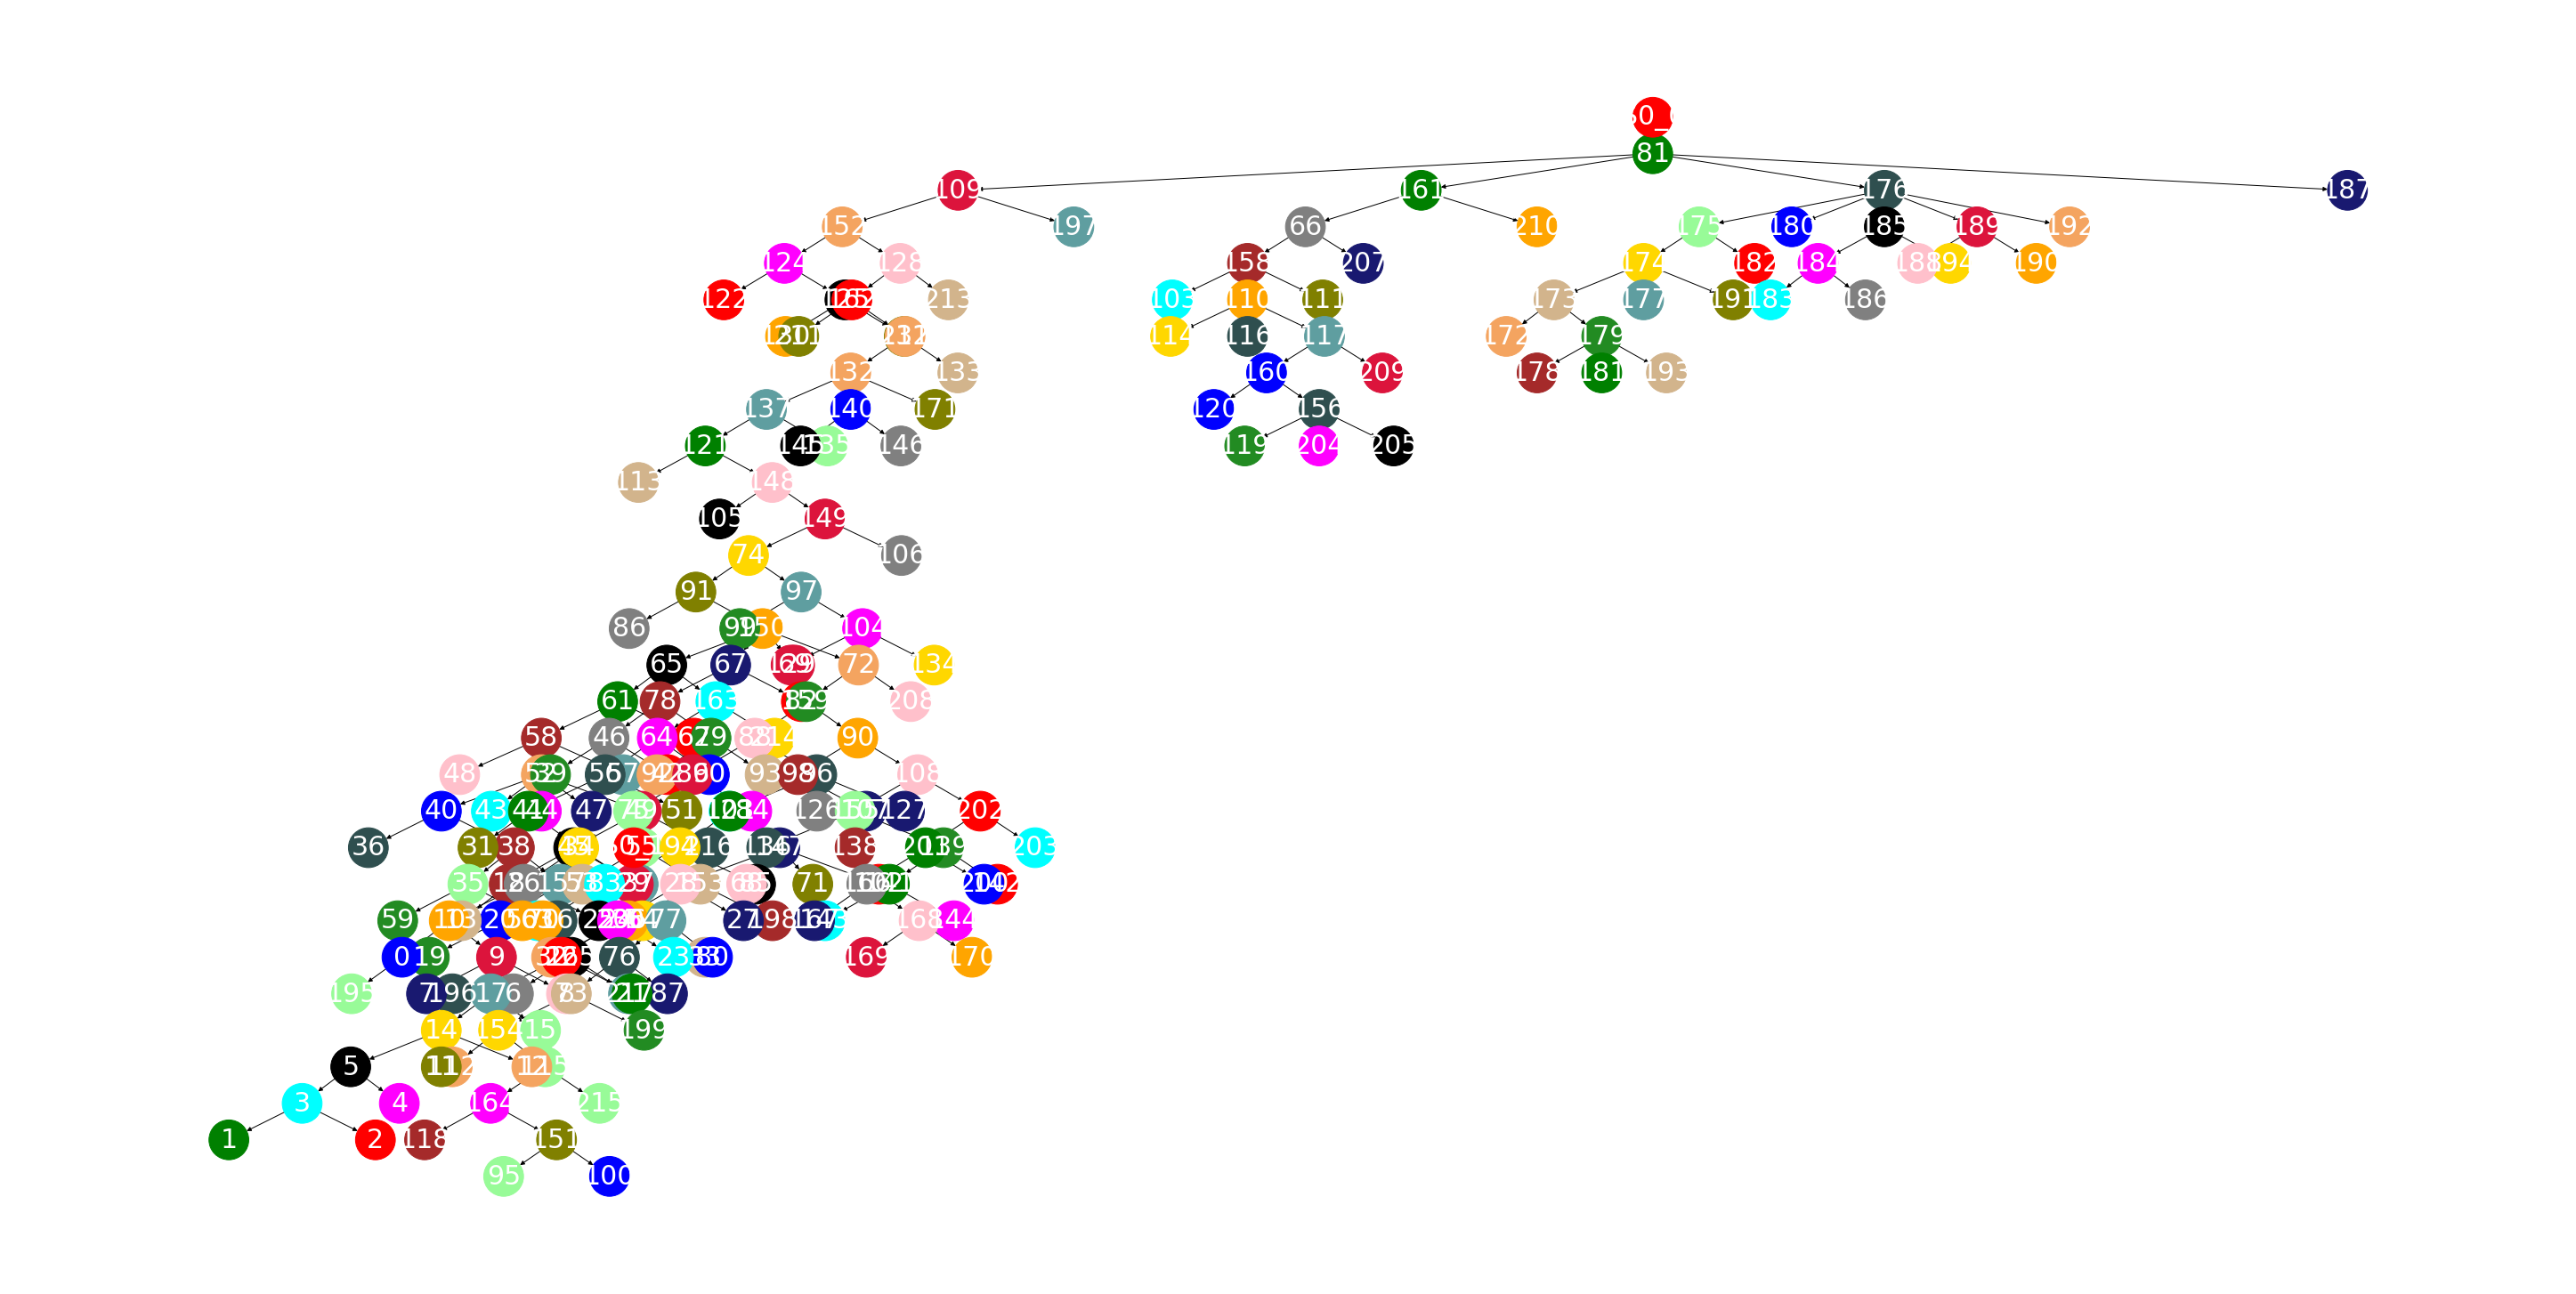

In [46]:
nviz.plot_limb_concept_network_2D(recovered_neuron,node_colors=ret_col)

In [43]:
nviz.visualize_neuron(recovered_neuron,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton
Working on  new stand alone scatter points


# Debugging the LImb

In [53]:
segment_id

864691136535575714

In [70]:
#predefined arguments for the Neuron constructor

decomposition_type="meshafterparty"
mesh_correspondence="meshparty" #meshafterparty_adaptive
distance_by_mesh_center=True #how the distance is calculated for mesh correspondence
meshparty_segment_size = 100
meshparty_n_surface_downsampling = 2
meshparty_adaptive_correspondence_after_creation=False
suppress_preprocessing_print=True
computed_attribute_dict=None
somas = somas
branch_skeleton_data=None
combine_close_skeleton_nodes = True
combine_close_skeleton_nodes_threshold=700
ignore_warnings=True
suppress_output=False
calculate_spines=True
widths_to_calculate=["no_spine_median_mesh_center"]
fill_hole_size=2000

In [71]:
#arguments for the preprocess neuron
mesh = current_neuron_mesh
segment_id=segment_id
description=description

sig_th_initial_split=15 #for significant splitting meshes in the intial mesh split
limb_threshold = 2000 #the mesh faces threshold for a mesh to be qualified as a limb (otherwise too small)
filter_end_node_length=4001 #used in cleaning the skeleton during skeletonizations
return_no_somas = False

decomposition_type=decomposition_type
mesh_correspondence=mesh_correspondence
distance_by_mesh_center=distance_by_mesh_center
meshparty_segment_size =meshparty_segment_size
meshparty_n_surface_downsampling = meshparty_n_surface_downsampling
somas=somas
branch_skeleton_data=branch_skeleton_data
combine_close_skeleton_nodes = combine_close_skeleton_nodes
combine_close_skeleton_nodes_threshold=combine_close_skeleton_nodes_threshold

use_meshafterparty=True

# The preprocessing step

In [58]:
from preprocessing_vp2 import *

In [59]:
pre_branch_connectivity = "edges"
print(f"use_meshafterparty = {use_meshafterparty}")

whole_processing_tiempo = time.time()


"""
Purpose: To process the mesh into a format that can be loaded into the neuron class
and used for higher order processing (how to visualize is included)

This method includes the fusion

"""
if description is None:
    description = "no_description"
if segment_id is None:
    #pick a random segment id
    segment_id = np.random.randint(100000000)
    print(f"picking a random 7 digit segment id: {segment_id}")
    description += "_random_id"


if mesh is None:
    if mesh_file is None:
        raise Exception("No mesh or mesh_file file were given")
    else:
        current_neuron = tu.load_mesh_no_processing(mesh_file)
else:
    current_neuron = mesh




use_meshafterparty = True


In [60]:
# -------- Phase 1: Doing Soma Detection (if Not already done) ---------- #
if somas is None:
    soma_mesh_list,run_time,total_soma_list_sdf = sm.extract_soma_center(segment_id,
                                             current_neuron.vertices,
                                             current_neuron.faces)
else:
    soma_mesh_list,run_time,total_soma_list_sdf = somas
    print(f"Using pre-computed somas: soma_mesh_list = {soma_mesh_list}")

# geting the soma centers
if len(soma_mesh_list) <= 0:
    print(f"**** No Somas Found for Mesh {segment_id} so just one mesh")
    soma_mesh_list_centers = []
    if return_no_somas:
        return_value= soma_mesh_list_centers
    raise Exception("Processing of No Somas is not yet implemented yet")
else:
    #compute the soma centers
    print(f"Soma List = {soma_mesh_list}")

    soma_mesh_list_centers = sm.find_soma_centroids(soma_mesh_list)
    print(f"soma_mesh_list_centers = {soma_mesh_list_centers}")




Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(23444, 3), faces.shape=(46516, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(23444, 3), faces.shape=(46516, 3))>]
soma_mesh_list_centers = [array([1329540.13862822,  476301.83616277,  701847.28207217])]


In [61]:

#--- Phase 2: getting the soma submeshes that are connected to each soma and identifiying those that aren't 
# ------------------ (and eliminating any mesh pieces inside the soma) ------------------------

# -------- 11/13 Addition: Will remove the inside nucleus --------- #
interior_time = time.time()
main_mesh_total,inside_nucleus_pieces = tu.remove_mesh_interior(current_neuron,return_removed_pieces=True,
                                                               try_hole_close=False)
print(f"Total time for removing interior = {time.time() - interior_time}")


#finding the mesh pieces that contain the soma
#splitting the current neuron into distinct pieces
split_time = time.time()
split_meshes = tu.split_significant_pieces(
                            main_mesh_total,
                            significance_threshold=sig_th_initial_split,
                            print_flag=False,
                            connectivity=pre_branch_connectivity)
print(f"Total time for splitting mesh = {time.time() - split_time}")

print(f"# total split meshes = {len(split_meshes)}")

#returns the index of the split_meshes index that contains each soma    
containing_mesh_indices = sm.find_soma_centroid_containing_meshes(soma_mesh_list,
                                        split_meshes)

# filtering away any of the inside floating pieces: 
non_soma_touching_meshes = [m for i,m in enumerate(split_meshes)
                 if i not in list(containing_mesh_indices.values())]

#Adding the step that will filter away any pieces that are inside the soma
if len(non_soma_touching_meshes) > 0 and len(soma_mesh_list) > 0:
    """
    *** want to save these pieces that are inside of the soma***
    """

    non_soma_touching_meshes,inside_pieces = sm.filter_away_inside_soma_pieces(soma_mesh_list,non_soma_touching_meshes,
                                    significance_threshold=sig_th_initial_split,
                                    return_inside_pieces = True)

else:
    non_soma_touching_meshes = []
    inside_pieces=[]

#adding in the nuclei center to the inside pieces
inside_pieces += inside_nucleus_pieces


split_meshes # the meshes of the original mesh
containing_mesh_indices #the mapping of each soma centroid to the correct split mesh
soma_containing_meshes = sm.grouping_containing_mesh_indices(containing_mesh_indices)

soma_touching_meshes = [split_meshes[k] for k in soma_containing_meshes.keys()]


#     print(f"# of non soma touching seperate meshes = {len(non_soma_touching_meshes)}")
#     print(f"# of inside pieces = {len(inside_pieces)}")
print(f"\n-----Before filtering away multiple disconneted soma pieces-----")
print(f"# of soma containing seperate meshes = {len(soma_touching_meshes)}")
print(f"meshes with somas = {soma_containing_meshes}")

# ------ 11/15 Addition: Part 2.b 

"""
Pseudocode: 
1) Get the largest of the meshes with a soma (largest in soma_touching_meshes)
2) Save all other meshes not the largest in 
3) Overwrite the following variables:
    soma_mesh_list
    soma_containing_meshes
    soma_touching_meshes
    total_soma_list_sdf


"""
#1) Get the largest of the meshes with a soma (largest in soma_touching_meshes)
soma_containing_meshes_keys = np.array(list(soma_containing_meshes.keys()))
soma_touching_meshes = np.array([split_meshes[k] for k in soma_containing_meshes_keys])
largest_soma_touching_mesh_idx = soma_containing_meshes_keys[np.argmax([len(kk.faces) for kk in soma_touching_meshes])]

#2) Save all other meshes not the largest in 
not_processed_soma_containing_meshes_idx = np.setdiff1d(soma_containing_meshes_keys,[largest_soma_touching_mesh_idx])
not_processed_soma_containing_meshes = [split_meshes[k] for k in not_processed_soma_containing_meshes_idx]
print(f"Number of not_processed_soma_containing_meshes = {len(not_processed_soma_containing_meshes)}")

"""
3) Overwrite the following variables:
    soma_mesh_list
    soma_containing_meshes
    soma_touching_meshes
    total_soma_list_sdf

"""

somas_idx_to_process = soma_containing_meshes[largest_soma_touching_mesh_idx]
soma_mesh_list = [soma_mesh_list[k] for k in somas_idx_to_process]

soma_containing_meshes = {largest_soma_touching_mesh_idx:list(np.arange(0,len(soma_mesh_list)))}

soma_touching_meshes = [split_meshes[largest_soma_touching_mesh_idx]]

total_soma_list_sdf = total_soma_list_sdf[somas_idx_to_process]

print(f"\n-----After filtering away multiple disconneted soma pieces-----")
print(f"# of soma containing seperate meshes = {len(soma_touching_meshes)}")
print(f"meshes with somas = {soma_containing_meshes}")



xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/neuron_30143.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/neuron_30143_remove_interior.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/remove_interior_390547.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/neuron_30143.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/neuron_30143_remove_interior.off
/notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/remove_interior_390547.mls is being deleted....
THERE WERE NO MESH PIECES GREATER THAN THE significance_threshold
No significant (700) interior meshes present
largest is 162
Total time for removing interior = 73.78747415542603
Total time for splitting mesh = 0.8560018539428711
# total split meshes = 52
There were 51 pieces found after size threshold

-----Before

In [62]:
#--- Phase 3:  Soma Extraction was great (but it wasn't the original soma faces), so now need to get the original soma faces and the original non-soma faces of original pieces

"""
for each soma touching mesh get the following:
1) original soma meshes
2) significant mesh pieces touching these somas
3) The soma connectivity to each of the significant mesh pieces
-- later will just translate the 


Process: 

1) Final all soma faces (through soma extraction and then soma original faces function)
2) Subtact all soma faces from original mesh
3) Find all significant mesh pieces
4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all
   the available somas
Conclusion: Will have connectivity map


"""

soma_touching_mesh_data = dict()

for z,(mesh_idx, soma_idxes) in enumerate(soma_containing_meshes.items()):
    soma_touching_mesh_data[z] = dict()
    print(f"\n\n----Working on soma-containing mesh piece {z}----")

    #1) Final all soma faces (through soma extraction and then soma original faces function)
    current_mesh = split_meshes[mesh_idx]

    current_soma_mesh_list = [soma_mesh_list[k] for k in soma_idxes]

    current_time = time.time()
    mesh_pieces_without_soma = sm.subtract_soma(current_soma_mesh_list,current_mesh,
                                                significance_threshold=250,
                                               connectivity=pre_branch_connectivity)
    print(f"Total time for Subtract Soam = {time.time() - current_time}")
    current_time = time.time()

    mesh_pieces_without_soma_stacked = tu.combine_meshes(mesh_pieces_without_soma)

    # find the original soma faces of mesh
    soma_faces = tu.original_mesh_faces_map(current_mesh,mesh_pieces_without_soma_stacked,matching=False)
    print(f"Total time for Original_mesh_faces_map for mesh_pieces without soma= {time.time() - current_time}")
    current_time = time.time()
    soma_meshes = current_mesh.submesh([soma_faces],append=True,repair=False)

    # finding the non-soma original faces
    non_soma_faces = tu.original_mesh_faces_map(current_mesh,soma_meshes,matching=False)
    non_soma_stacked_mesh = current_mesh.submesh([non_soma_faces],append=True,repair=False)

    print(f"Total time for Original_mesh_faces_map for somas= {time.time() - current_time}")
    current_time = time.time()

    #4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all the available somas
    # get all the seperate mesh faces

    #How to seperate the mesh faces
    seperate_soma_meshes,soma_face_components = tu.split(soma_meshes,only_watertight=False,
                                                        connectivity=pre_branch_connectivity)
    #take the top largest ones depending how many were originally in the soma list
    seperate_soma_meshes = seperate_soma_meshes[:len(soma_mesh_list)]
    soma_face_components = soma_face_components[:len(soma_mesh_list)]

    soma_touching_mesh_data[z]["soma_meshes"] = seperate_soma_meshes




    # 3) Find all significant mesh pieces
    """
    Pseudocode: 
    a) Iterate through all of the somas and get the pieces that are connected
    b) Concatenate all the results into one list and order
    c) Filter away the mesh pieces that aren't touching and add to the floating pieces

    """
    sig_non_soma_pieces,insignificant_limbs = tu.split_significant_pieces(non_soma_stacked_mesh,significance_threshold=limb_threshold,
                                                     return_insignificant_pieces=True,
                                                                         connectivity=pre_branch_connectivity)

    # a) Filter these down to only those touching the somas
    all_conneted_non_soma_pieces = []
    for i,curr_soma in enumerate(seperate_soma_meshes):
        (connected_mesh_pieces,
         connected_mesh_pieces_vertices,
         connected_mesh_pieces_vertices_idx) = tu.mesh_pieces_connectivity(
                        main_mesh=current_mesh,
                        central_piece=curr_soma,
                        periphery_pieces = sig_non_soma_pieces,
                        return_vertices = True,
                        return_vertices_idx=True)
        all_conneted_non_soma_pieces.append(connected_mesh_pieces)

    #b) Iterate through all of the somas and get the pieces that are connected
    t_non_soma_pieces = np.concatenate(all_conneted_non_soma_pieces)

    #c) Filter away the mesh pieces that aren't touching and add to the floating pieces
    sig_non_soma_pieces = [s_t for hh,s_t in enumerate(sig_non_soma_pieces) if hh in t_non_soma_pieces]
    new_floating_pieces = [s_t for hh,s_t in enumerate(sig_non_soma_pieces) if hh not in t_non_soma_pieces]

    print(f"new_floating_pieces = {new_floating_pieces}")

    non_soma_touching_meshes += new_floating_pieces



    print(f"Total time for sig_non_soma_pieces= {time.time() - current_time}")
    current_time = time.time()

    soma_touching_mesh_data[z]["branch_meshes"] = sig_non_soma_pieces






    print(f"Total time for split= {time.time() - current_time}")
    current_time = time.time()



    soma_to_piece_connectivity = dict()
    soma_to_piece_touching_vertices = dict()
    soma_to_piece_touching_vertices_idx = dict()
    limb_root_nodes = dict()

    m_vert_graph = tu.mesh_vertex_graph(current_mesh)

    for i,curr_soma in enumerate(seperate_soma_meshes):
        (connected_mesh_pieces,
         connected_mesh_pieces_vertices,
         connected_mesh_pieces_vertices_idx) = tu.mesh_pieces_connectivity(
                        main_mesh=current_mesh,
                        central_piece=curr_soma,
                        periphery_pieces = sig_non_soma_pieces,
                        return_vertices = True,
                        return_vertices_idx=True)
        #print(f"soma {i}: connected_mesh_pieces = {connected_mesh_pieces}")
        soma_to_piece_connectivity[i] = connected_mesh_pieces

        soma_to_piece_touching_vertices[i] = dict()
        for piece_index,piece_idx in enumerate(connected_mesh_pieces):
            limb_root_nodes[piece_idx] = connected_mesh_pieces_vertices[piece_index][0]

            """ Old way of finding vertex connected components on a mesh without trimesh function
            #find the number of touching groups and save those 
            soma_touching_graph = m_vert_graph.subgraph(connected_mesh_pieces_vertices_idx[piece_index])
            soma_con_comp = [current_mesh.vertices[np.array(list(k)).astype("int")] for k in list(nx.connected_components(soma_touching_graph))]
            soma_to_piece_touching_vertices[i][piece_idx] = soma_con_comp
            """

            soma_to_piece_touching_vertices[i][piece_idx] = tu.split_vertex_list_into_connected_components(
                                                vertex_indices_list=connected_mesh_pieces_vertices_idx[piece_index],
                                                mesh=current_mesh, 
                                                vertex_graph=m_vert_graph, 
                                                return_coordinates=True
                                               )





#         border_debug = False
#         if border_debug:
#             print(f"soma_to_piece_connectivity = {soma_to_piece_connectivity}")
#             print(f"soma_to_piece_touching_vertices = {soma_to_piece_touching_vertices}")


    print(f"Total time for mesh_pieces_connectivity= {time.time() - current_time}")

    soma_touching_mesh_data[z]["soma_to_piece_connectivity"] = soma_to_piece_connectivity

print(f"# of insignificant_limbs = {len(insignificant_limbs)} with trimesh : {insignificant_limbs}")
print(f"# of not_processed_soma_containing_meshes = {len(not_processed_soma_containing_meshes)} with trimesh : {not_processed_soma_containing_meshes}")




# Lets have an alert if there was more than one soma disconnected meshes
if len(soma_touching_mesh_data.keys()) > 1:
    raise Exception("More than 1 disconnected meshes that contain somas")

current_mesh_data = soma_touching_mesh_data
soma_containing_idx = 0

#doing inversion of the connectivity and touching vertices
piece_to_soma_touching_vertices = gu.flip_key_orders_for_dict(soma_to_piece_touching_vertices)







----Working on soma-containing mesh piece 0----

inside Soma subtraction
Total Time for soma mesh cancellation = 2.286
Total time for Subtract Soam = 2.2876057624816895
Total time for Original_mesh_faces_map for mesh_pieces without soma= 1.0293478965759277
Total time for Original_mesh_faces_map for somas= 1.0596418380737305
new_floating_pieces = []
Total time for sig_non_soma_pieces= 7.710286378860474
Total time for split= 2.1457672119140625e-06
Total time for mesh_pieces_connectivity= 17.200000286102295
# of insignificant_limbs = 0 with trimesh : []
# of not_processed_soma_containing_meshes = 0 with trimesh : []


In [82]:
# Phase 4: Skeletonization, Mesh Correspondence,  

proper_time = time.time()

#The containers that will hold the final data for the preprocessed neuron
limb_correspondence=dict()
limb_network_stating_info = dict()

# ---------- Part A: skeletonization and mesh decomposition --------- #
skeleton_time = time.time()

for curr_limb_idx,limb_mesh_mparty in enumerate(current_mesh_data[0]["branch_meshes"]):

    #Arguments to pass to the specific function (when working with a limb)
    soma_touching_vertices_dict = piece_to_soma_touching_vertices[curr_limb_idx]

#     if curr_limb_idx != 10:
#         continue

    curr_limb_time = time.time()
    print(f"\n\n----- Working on Proper Limb # {curr_limb_idx} ---------")

    print(f"meshparty_segment_size = {meshparty_segment_size}")
    limb_correspondence_individual,network_starting_info = preprocess_limb(mesh=limb_mesh_mparty,
                   soma_touching_vertices_dict = soma_touching_vertices_dict,
                   return_concept_network = False, 
                   return_concept_network_starting_info=True,
                   width_threshold_MAP=500,
                   size_threshold_MAP=2000,
                   surface_reconstruction_size=1000,  

                   #arguments added from the big preprocessing step                                                            
                   distance_by_mesh_center=distance_by_mesh_center,
                   meshparty_segment_size=meshparty_segment_size,
                   meshparty_n_surface_downsampling = meshparty_n_surface_downsampling,

                    use_meshafterparty=use_meshafterparty,

                   )
    #Storing all of the data to be sent to 

    limb_correspondence[curr_limb_idx] = limb_correspondence_individual
    limb_network_stating_info[curr_limb_idx] = network_starting_info

print(f"Total time for Skeletonization and Mesh Correspondence = {time.time() - skeleton_time}")



# ---------- Part B: Stitching on floating pieces --------- #
print("\n\n ----- Working on Stitching ----------")

floating_stitching_time = time.time()

if len(limb_correspondence) > 0:
    non_soma_touching_meshes_to_stitch = tu.check_meshes_outside_multiple_mesh_bbox(seperate_soma_meshes,non_soma_touching_meshes,
                             return_indices=False)

    limb_correspondence_with_floating_pieces = attach_floating_pieces_to_limb_correspondence(
            limb_correspondence,
            floating_meshes=non_soma_touching_meshes_to_stitch,
            floating_piece_face_threshold = 600,
            max_stitch_distance=8000,
            distance_to_move_point_threshold = 4000,
            verbose = False)
else:
    limb_correspondence_with_floating_pieces = limb_correspondence




print(f"Total time for stitching floating pieces = {time.time() - floating_stitching_time}")





# ---------- Part C: Computing Concept Networks --------- #
concept_network_time = time.time()

limb_concept_networks=dict()
limb_labels=dict()

for curr_limb_idx,limb_mesh_mparty in enumerate(current_mesh_data[0]["branch_meshes"]):
    limb_to_soma_concept_networks = calculate_limb_concept_networks(limb_correspondence_with_floating_pieces[curr_limb_idx],
                                                                    limb_network_stating_info[curr_limb_idx],
                                                                    run_concept_network_checks=True,
                                                                       )   



    limb_concept_networks[curr_limb_idx] = limb_to_soma_concept_networks
    limb_labels[curr_limb_idx]= "Unlabeled"

print(f"Total time for Concept Networks = {time.time() - concept_network_time}")






----- Working on Proper Limb # 0 ---------
meshparty_segment_size = 100
root_curr = [1330574.   482818.   708844.2]
Time for preparing soma vertices and root: 0.00026488304138183594
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:14<00:00, 14.63s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 18.005889892578125
connecting at the root
branches_touching_root = [105]
length of Graph = 28055
Working on path [23222. 23230. 23241. 23242.]
path_degrees = [3, 2, 2, 3]
Working on path [28055. 23229. 23237. 23246. 23249.]
path_degrees = [4, 2, 2, 2, 3]
Working on path [28056. 23256. 23266. 23270. 23277. 23284.]
path_degrees = [5, 2, 2, 2, 2, 3]
Working on path [27721. 27736. 27748. 27751.]
path_degrees = [3, 2, 2, 3]
max(kept_branches_idx) = 105, len(kept_branches_idx) = 102
empty_indices % = 0.0
 conflict_indices % = 0.006570452720678363



AFTER face_lookup_resolved_test



Decomposing first pass: 34.46862506866455
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [11748, 15613, 14002, 975, 5683, 1599, 228, 7350, 3342, 5102, 369, 760, 7438, 14557, 15178, 4012, 14545, 407, 1170, 4881, 1005, 6932, 11179, 1149, 412, 10909, 14817, 37635, 16012, 8295, 15167, 13956, 3778, 7118, 1849, 8492, 14246, 1361, 4213, 33459, 22141, 43018, 14029, 19861, 2570, 1039, 19878, 26954, 2096, 9590, 19226, 9919, 6646, 5014, 3672]
mesh_large_connectivity: 2.3810536861419678
Finding MAP candidates connected components: 0.0005414485931396484
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.5987286567687988
Grouping MP Sublimbs by Graph: 0.15352296829223633
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.03655242919921875
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starti

KeyboardInterrupt: 

In [83]:
mesh=limb_mesh_mparty
soma_touching_vertices_dict = soma_touching_vertices_dict
return_concept_network = False
return_concept_network_starting_info=True
width_threshold_MAP=500
size_threshold_MAP=2000
surface_reconstruction_size=1000

#arguments added from the big preprocessing step                                                            
distance_by_mesh_center=distance_by_mesh_center
meshparty_segment_size=meshparty_segment_size
meshparty_n_surface_downsampling = meshparty_n_surface_downsampling

use_meshafterparty=use_meshafterparty


# ----------------- other parameters that are not specified -------------- #
combine_close_skeleton_nodes=True
combine_close_skeleton_nodes_threshold=700
filter_end_node_length=1500#4001,
perform_cleaning_checks = True


#parameters for MP skeletonization,

#Parameters for setting how the MAP skeletonization takes place
use_surface_after_CGAL=False

#parametrers for stitching the MAP and MP pieces together
move_MAP_stitch_to_end_or_branch = True
distance_to_move_point_threshold=500

#concept_network parameters
run_concept_network_checks = True

#printing controls
verbose = True
print_fusion_steps=True





In [84]:

# ---------------------- Beginning of the function ------ #
curr_limb_time = time.time()

limb_mesh_mparty = mesh


#will store a list of all the endpoints tha tmust be kept:
limb_to_endpoints_must_keep_list = []
limb_to_soma_touching_vertices_list = []

# --------------- Part 1 and 2: Getting Border Vertices and Setting the Root------------- #
fusion_time = time.time()
#will eventually get the current root from soma_to_piece_touching_vertices[i]
if not soma_touching_vertices_dict is None:
    root_curr = soma_touching_vertices_dict[list(soma_touching_vertices_dict.keys())[0]][0][0]
else:
    root_curr = None

print(f"root_curr = {root_curr}")

if print_fusion_steps:
    print(f"Time for preparing soma vertices and root: {time.time() - fusion_time }")
    fusion_time = time.time()

# --------------- Part 3: Meshparty skeletonization and Decomposition ------------- #
sk_meshparty_obj = m_sk.skeletonize_mesh_largest_component(limb_mesh_mparty,
                                                        root=root_curr,
                                                          filter_mesh=False)

print(f"meshparty_segment_size = {meshparty_segment_size}")

if print_fusion_steps:
    print(f"Time for 1st pass MP skeletonization: {time.time() - fusion_time }")
    fusion_time = time.time()

(segment_branches, #skeleton branches
divided_submeshes, divided_submeshes_idx, #mesh correspondence (mesh and indices)
segment_widths_median) = m_sk.skeleton_obj_to_branches(sk_meshparty_obj,
                                                      mesh = limb_mesh_mparty,
                                                      meshparty_segment_size=meshparty_segment_size)





if print_fusion_steps:
    print(f"Decomposing first pass: {time.time() - fusion_time }")
    fusion_time = time.time()


if use_meshafterparty:
    print("Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence")
    # --------------- Part 4: Find Individual Branches that could be MAP processed because of width ------------- #
    #gettin the branches that should be passed through MAP skeletonization
    pieces_above_threshold = np.where(segment_widths_median>width_threshold_MAP)[0]

    #getting the correspondnece info for those MAP qualifying
    width_large = segment_widths_median[pieces_above_threshold]
    sk_large = [segment_branches[k] for k in pieces_above_threshold]
    mesh_large_idx = [divided_submeshes_idx[k] for k in pieces_above_threshold]
else:
    print("Only Using MeshParty Skeletonization and Mesh Correspondence")
    mesh_large_idx = []
    width_large = []
    sk_large = []


print("Another print")
mesh_pieces_for_MAP = []
mesh_pieces_for_MAP_face_idx = []


if len(mesh_large_idx) > 0: #will only continue processing if found MAP candidates

    # --------------- Part 5: Find mesh connectivity and group MAP branch candidates into MAP sublimbs ------------- #
    print(f"Found len(mesh_large_idx) MAP candidates: {[len(k) for k in mesh_large_idx]}")

    #finds the connectivity edges of all the MAP candidates
    mesh_large_connectivity = tu.mesh_list_connectivity(meshes = mesh_large_idx,
                                                        connectivity="vertices",
                            main_mesh = limb_mesh_mparty,
                            print_flag = False)
    if print_fusion_steps:
        print(f"mesh_large_connectivity: {time.time() - fusion_time }")
        fusion_time = time.time()
    """
    --------------- Grouping MAP candidates ----------------
    Purpose: Will see what mesh pieces should be grouped together
    to pass through CGAL skeletonization


    Pseudocode: 
    1) build a networkx graph with all nodes for mesh_large_idx indexes
    2) Add the edges
    3) Find the connected components
    4) Find sizes of connected components
    5) For all those connected components that are of a large enough size, 
    add the mesh branches and skeletons to the final list


    """
    G = nx.Graph()
    G.add_nodes_from(np.arange(len(mesh_large_idx)))
    G.add_edges_from(mesh_large_connectivity)
    conn_comp = list(nx.connected_components(G))

    filtered_pieces = []

    sk_large_size_filt = []
    mesh_large_idx_size_filt = []
    width_large_size_filt = []

    for cc in conn_comp:
        total_cc_size = np.sum([len(mesh_large_idx[k]) for k in cc])
        if total_cc_size>size_threshold_MAP:
            #print(f"cc ({cc}) passed the size threshold because size was {total_cc_size}")
            filtered_pieces.append(pieces_above_threshold[list(cc)])

    if print_fusion_steps:
        print(f"Finding MAP candidates connected components: {time.time() - fusion_time }")
        fusion_time = time.time()

    #filtered_pieces: will have the indexes of all the branch candidates that should  be 
    #grouped together and passed through MAP skeletonization

    if len(filtered_pieces) > 0:
        # --------------- Part 6: If Found MAP sublimbs, Get the meshes and mesh_idxs of the sublimbs ------------- #
        print(f"len(filtered_pieces) = {len(filtered_pieces)}")
        #all the pieces that will require MAP mesh correspondence and skeletonization
        #(already organized into their components)
        mesh_pieces_for_MAP = [limb_mesh_mparty.submesh([np.concatenate(divided_submeshes_idx[k])],append=True,repair=False) for k in filtered_pieces]
        mesh_pieces_for_MAP_face_idx = [np.concatenate(divided_submeshes_idx[k]) for k in filtered_pieces]



        """
        Old Way: Finding connectivity of pieces through
        mesh_idx_MP = [divided_submeshes_idx[k] for k in pieces_idx_MP]

        mesh_large_connectivity_MP = tu.mesh_list_connectivity(meshes = mesh_idx_MP,
                                main_mesh = limb_mesh_mparty,
                                print_flag = False)

        New Way: going to use skeleton connectivity to determine
        connectivity of pieces

        Pseudocode: 
        1)

        """
        # --------------- Part 7: If Found MAP sublimbs, Get the meshes and mesh_idxs of the sublimbs ------------- #
        # ********* if there are no pieces leftover then will automatically make all the lists below just empty (don't need to if.. else.. the case)****
        pieces_idx_MP = np.setdiff1d(np.arange(len(divided_submeshes_idx)),np.concatenate(filtered_pieces))

        skeleton_MP = [segment_branches[k] for k in pieces_idx_MP]
        skeleton_connectivity_MP = sk.skeleton_list_connectivity(
                                        skeletons=skeleton_MP
                                        )
        if print_fusion_steps:
            print(f"skeleton_connectivity_MP : {time.time() - fusion_time }")
            fusion_time = time.time()

        G = nx.Graph()
        G.add_nodes_from(np.arange(len(skeleton_MP)))
        G.add_edges_from(skeleton_connectivity_MP)
        sublimbs_MP = list(nx.connected_components(G))
        sublimbs_MP_orig_idx = [pieces_idx_MP[list(k)] for k in sublimbs_MP]


        #concatenate into sublimbs the skeletons and meshes
        sublimb_mesh_idx_branches_MP = [divided_submeshes_idx[k] for k in sublimbs_MP_orig_idx]
        sublimb_mesh_branches_MP = [[limb_mesh_mparty.submesh([ki],append=True,repair=False)
                                    for ki in k] for k in sublimb_mesh_idx_branches_MP]
        sublimb_meshes_MP = [limb_mesh_mparty.submesh([np.concatenate(k)],append=True,repair=False)
                                                     for k in sublimb_mesh_idx_branches_MP]
        sublimb_meshes_MP_face_idx = [np.concatenate(k)
                                                     for k in sublimb_mesh_idx_branches_MP]
        sublimb_skeleton_branches = [segment_branches[k] for k in sublimbs_MP_orig_idx]
        widths_MP = [segment_widths_median[k] for k in sublimbs_MP_orig_idx]

        if print_fusion_steps:
            print(f"Grouping MP Sublimbs by Graph: {time.time() - fusion_time }")
            fusion_time = time.time()


# else: #if no pieces were determine to need MAP processing
#     print("No MAP processing needed: just returning the Meshparty skeletonization and mesh correspondence")
#     raise Exception("Returning MP correspondence")


# nviz.plot_objects(main_mesh=tu.combine_meshes([limb_mesh_mparty,current_neuron["S0"].mesh]),
#                   main_mesh_color="green",
#     skeletons=sk_large_size_filt,
#      meshes=[limb_mesh_mparty.submesh([k],append=True) for k in mesh_large_idx_size_filt],
#       meshes_colors="red")








# --------------- Part 8: If No MAP sublimbs found, set the MP sublimb lists to just the whole MP branch decomposition ------------- #

#if no sublimbs need to be decomposed with MAP then just reassign all of the previous MP processing to the sublimb_MPs
if len(mesh_pieces_for_MAP) == 0:
    sublimb_meshes_MP = [limb_mesh_mparty] #trimesh pieces that have already been passed through MP skeletonization (may not need)
    # -- the decomposition information ---
    sublimb_mesh_branches_MP = [divided_submeshes] #the mesh branches for all the disconnected sublimbs
    sublimb_mesh_idx_branches_MP = [divided_submeshes_idx] #The mesh branches idx that have already passed through MP skeletonization
    sublimb_skeleton_branches = [segment_branches]#the skeleton bnraches for all the sublimbs
    widths_MP = [segment_widths_median] #the mesh branches widths for all the disconnected groups

    MAP_flag = False
else:
    MAP_flag = True



mesh_pieces_for_MAP #trimesh pieces that should go through CGAL skeletonization
sublimb_meshes_MP #trimesh pieces that have already been passed through MP skeletonization (may not need)

# -- the decomposition information ---
sublimb_mesh_branches_MP #the mesh branches for all the disconnected sublimbs
sublimb_mesh_idx_branches_MP #The mesh branches idx that have already passed through MP skeletonization
sublimb_skeleton_branches #the skeleton bnraches for all the sublimbs
widths_MP #the mesh branches widths for all the disconnected groups

if print_fusion_steps:
    print(f"Divinding into MP and MAP pieces: {time.time() - fusion_time }")
    fusion_time = time.time()



# ------------------- At this point have the correct division between MAP and MP ------------------------

# -------------- Part 9: Doing the MAP decomposition ------------------ #
global_start_time = time.time()
endpoints_must_keep = dict()



limb_correspondence_MAP = dict()

for sublimb_idx,(mesh,mesh_idx) in enumerate(zip(mesh_pieces_for_MAP,mesh_pieces_for_MAP_face_idx)):
    print(f"--- Working on MAP piece {sublimb_idx}---")
    #print(f"soma_touching_vertices_dict = {soma_touching_vertices_dict}")
    mesh_start_time = time.time()
    curr_soma_to_piece_touching_vertices = filter_soma_touching_vertices_dict_by_mesh(
    mesh = mesh,
    curr_piece_to_soma_touching_vertices = soma_touching_vertices_dict
    )

    if print_fusion_steps:
        print(f"MAP Filtering Soma Pieces: {time.time() - fusion_time }")
        fusion_time = time.time()

    # ---- 0) Generating the Clean skeletons  -------------------------------------------#
    if not curr_soma_to_piece_touching_vertices is None:
        curr_total_border_vertices = dict([(k,np.vstack(v)) for k,v in curr_soma_to_piece_touching_vertices.items()])
    else:
        curr_total_border_vertices = None

    
    cleaned_branch,curr_limb_endpoints_must_keep = sk.skeletonize_and_clean_connected_branch_CGAL(
        mesh=mesh,
        curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices,
        total_border_vertices=curr_total_border_vertices,
        filter_end_node_length=filter_end_node_length,
        perform_cleaning_checks=perform_cleaning_checks,
        combine_close_skeleton_nodes = combine_close_skeleton_nodes,
        combine_close_skeleton_nodes_threshold=combine_close_skeleton_nodes_threshold,
    use_surface_after_CGAL=use_surface_after_CGAL,
    surface_reconstruction_size=surface_reconstruction_size)

    if not curr_limb_endpoints_must_keep is None:
        limb_to_endpoints_must_keep_list.append(curr_limb_endpoints_must_keep)
        limb_to_soma_touching_vertices_list.append(curr_soma_to_piece_touching_vertices)
    else:
        print("Inside MAP decomposition and curr_limb_endpoints_must_keep was None")

    if len(cleaned_branch) == 0:
        raise Exception(f"Found a zero length skeleton for limb {z} of trmesh {branch}")

    if print_fusion_steps:
        print(f"skeletonize_and_clean_connected_branch_CGAL: {time.time() - fusion_time }")
        fusion_time = time.time()

    # ---- 1) Generating Initial Mesh Correspondence -------------------------------------------#
    start_time = time.time()

    print(f"Working on limb correspondence for #{sublimb_idx} MAP piece")
    local_correspondence = mesh_correspondence_first_pass(mesh=mesh,
                                                         skeleton=cleaned_branch,
                                                         distance_by_mesh_center=distance_by_mesh_center)


    print(f"Total time for decomposition = {time.time() - start_time}")
    if print_fusion_steps:
        print(f"mesh_correspondence_first_pass: {time.time() - fusion_time }")
        fusion_time = time.time()


    #------------- 2) Doing Some checks on the initial corespondence -------- #


    if perform_cleaning_checks:
        check_skeletonization_and_decomp(skeleton=cleaned_branch,
                                        local_correspondence=local_correspondence)

    # -------3) Finishing off the face correspondence so get 1-to-1 correspondence of mesh face to skeletal piece
    local_correspondence_revised = correspondence_1_to_1(mesh=mesh,
                                    local_correspondence=local_correspondence,
                                    curr_limb_endpoints_must_keep=curr_limb_endpoints_must_keep,
                                    curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices)

    # -------3b) Fixing the mesh indices to correspond to the larger mesh as a whole
    for k,v in local_correspondence_revised.items():
        local_correspondence_revised[k]["branch_face_idx"] = mesh_idx[local_correspondence_revised[k]["branch_face_idx"]]

    print(f"Total time for MAP sublimb #{sublimb_idx} mesh processing = {time.time() - mesh_start_time}")

    if print_fusion_steps:
        print(f"correspondence_1_to_1: {time.time() - fusion_time }")
        fusion_time = time.time()

    limb_correspondence_MAP[sublimb_idx] = local_correspondence_revised

print(f"Total time for MAP sublimb processing {time.time() - global_start_time}")





# ----------------- Part 10: Doing the MP Decomposition ---------------------- #




sublimb_meshes_MP #trimesh pieces that have already been passed through MP skeletonization (may not need)
# -- the decomposition information ---
sublimb_mesh_branches_MP #the mesh branches for all the disconnected sublimbs
sublimb_mesh_idx_branches_MP #The mesh branches idx that have already passed through MP skeletonization
sublimb_skeleton_branches #the skeleton bnraches for all the sublimbs
widths_MP #the mesh branches widths for all the disconnected groups

limb_correspondence_MP = dict()

for sublimb_idx,mesh in enumerate(sublimb_meshes_MP):
    print(f"---- Working on MP Decomposition #{sublimb_idx} ----")
    mesh_start_time = time.time()

    if len(sublimb_meshes_MP) == 1 and MAP_flag == False:
        print("Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece ")
        curr_soma_to_piece_touching_vertices = soma_touching_vertices_dict
    else:
        if not soma_touching_vertices_dict is None:
            print("Computing the current soma touching verts dict manually")
            curr_soma_to_piece_touching_vertices = filter_soma_touching_vertices_dict_by_mesh(
                                                mesh = mesh,
                                                curr_piece_to_soma_touching_vertices = soma_touching_vertices_dict
                                                )
        else:
            curr_soma_to_piece_touching_vertices = None

    if print_fusion_steps:
        print(f"MP filtering soma verts: {time.time() - fusion_time }")
        fusion_time = time.time()

    #creating all of the sublimb groups
    segment_branches = np.array(sublimb_skeleton_branches[sublimb_idx])
    whole_sk_MP = sk.stack_skeletons(segment_branches)
    branch = mesh
    divided_submeshes = np.array(sublimb_mesh_branches_MP[sublimb_idx])
    divided_submeshes_idx = sublimb_mesh_idx_branches_MP[sublimb_idx]
    segment_widths_median = widths_MP[sublimb_idx]


    if curr_soma_to_piece_touching_vertices is None:
        print(f"Do Not Need to Fix MP Decomposition {sublimb_idx} so just continuing")

    else:

        # ------- 11/9 addition: Fixing error where creating soma touching branch on mesh that doesn't touch border ------------------- #
        print(f"Fixing Possible Soma Extension Branch for Sublimb {sublimb_idx}")
        no_soma_extension_add = True 

        endpts_total = dict()
        curr_soma_to_piece_touching_vertices_total = dict()
        for sm_idx,sm_bord_verts_list in curr_soma_to_piece_touching_vertices.items():
            #will be used for later
            endpts_total[sm_idx] = []
            curr_soma_to_piece_touching_vertices_total[sm_idx] = []

            for sm_bord_verts in sm_bord_verts_list:
                #1) Get the mesh pieces that are touching the border
                matching_mesh_idx = tu.filter_meshes_by_containing_coordinates(mesh_list=divided_submeshes,
                                           nullifying_points=sm_bord_verts,
                                            filter_away=False,
                                           distance_threshold=0,
                                           return_indices=True)
                #2) concatenate all meshes and skeletons that are touching
                if len(matching_mesh_idx) <= 0:
                    raise Exception("None of branches were touching the border vertices when fixing MP pieces")

                touch_mesh = tu.combine_meshes(divided_submeshes[matching_mesh_idx])
                touch_sk = sk.stack_skeletons(segment_branches[matching_mesh_idx])

                local_curr_soma_to_piece_touching_vertices = {sm_idx:[sm_bord_verts]}
                new_sk,endpts,new_branch_info = sk.create_soma_extending_branches(current_skeleton=touch_sk,
                                      skeleton_mesh=touch_mesh,
                                      soma_to_piece_touching_vertices=local_curr_soma_to_piece_touching_vertices,
                                      return_endpoints_must_keep=True,
                                      return_created_branch_info=True,
                                      check_connected_skeleton=False)

                #3) Add the info to the new running lists
                endpts_total[sm_idx].append(endpts[sm_idx][0])
                curr_soma_to_piece_touching_vertices_total[sm_idx].append(sm_bord_verts)


                #4) Skip if no new branch was added
                br_info = new_branch_info[sm_idx][0]
                if br_info is None:
                    print("The new branch info was none so skipping \n")
                    continue

                #4 If new branch was made then 
                no_soma_extension_add=False

                #1) Get the newly added branch (and the original vertex which is the first row)
                br_new,sm_bord_verts = br_info["new_branch"],br_info["border_verts"] #this will hold the new branch and the border vertices corresponding to it

                curr_soma_to_piece_touching_vertices_MP = {sm_idx:[sm_bord_verts]}
                endpoints_must_keep_MP = {sm_idx:[br_new[0][1]]}


                orig_vertex = br_new[0][0]
                print(f"orig_vertex = {orig_vertex}")

                #2) Find the branches that have that coordinate (could be multiple)
                match_sk_branches = sk.find_branch_skeleton_with_specific_coordinate(segment_branches,
                    current_coordinate=orig_vertex)

                print(f"match_sk_branches = {match_sk_branches}")



                """ ******************* THIS NEEDS TO BE FIXED WITH THE SAME METHOD OF STITCHING ********************  """
                """
                Pseudocode:
                1) Find if branch point will require split or not
                2) If does require split then split the skeleton
                3) Gather mesh pieces for correspondence and the skeletons
                4) Run the mesh correspondence
                - this case calculate the new widths after run 
                5) Replace the old branch parts with the new ones



                """

                stitch_point_on_end_or_branch = find_if_stitch_point_on_end_or_branch(
                                                        matched_branches_skeletons= segment_branches[match_sk_branches],
                                                         stitch_coordinate=orig_vertex,
                                                          verbose=False)


                if not stitch_point_on_end_or_branch:
                    matching_branch_sk = sk.cut_skeleton_at_coordinate(skeleton=segment_branches[match_sk_branches][0],
                                                                      cut_coordinate = orig_vertex)
                else:
                    matching_branch_sk = segment_branches[match_sk_branches]


                #3) Find the mesh and skeleton of the winning branch
                matching_branch_meshes = np.array(divided_submeshes)[match_sk_branches]
                matching_branch_mesh_idx = np.array(divided_submeshes_idx)[match_sk_branches]
                extend_soma_mesh_idx = np.concatenate(matching_branch_mesh_idx)
                extend_soma_mesh = limb_mesh_mparty.submesh([extend_soma_mesh_idx ],append=True,repair=False)

                #4) Add newly created branch to skeleton and divide the skeleton into branches (could make 2 or 3)
                #extended_skeleton_to_soma = sk.stack_skeletons([list(matching_branch_sk),br_new])

                sk.check_skeleton_connected_component(sk.stack_skeletons(list(matching_branch_sk) + [br_new]))

                #5) Run Adaptive mesh correspondnece using branches and mesh
                local_correspondnece_MP = mesh_correspondence_first_pass(mesh=extend_soma_mesh,
                                                                         skeleton_branches = list(matching_branch_sk) + [br_new]
                                              #skeleton=extended_skeleton_to_soma
                                                                        )

                # GETTING MESHES THAT ARE NOT FULLY CONNECTED!!
                local_correspondence_revised = correspondence_1_to_1(mesh=extend_soma_mesh,
                                                            local_correspondence=local_correspondnece_MP,
                                                            curr_limb_endpoints_must_keep=endpoints_must_keep_MP,
                                                            curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices_MP)

                # All the things that should be revised:
            #     segment_branches, #skeleton branches
            #     divided_submeshes, divided_submeshes_idx, #mesh correspondence (mesh and indices)
            #     segment_widths_median


                new_submeshes = [k["branch_mesh"] for k in local_correspondence_revised.values()]
                new_submeshes_idx = [extend_soma_mesh_idx[k["branch_face_idx"]] for k in local_correspondence_revised.values()]
                new_skeletal_branches = [k["branch_skeleton"] for k in local_correspondence_revised.values()]

                #calculate the new width
                ray_inter = tu.ray_pyembree.RayMeshIntersector(limb_mesh_mparty)
                new_widths = []
                for new_s_idx in new_submeshes_idx:
                    curr_ray_distance = tu.ray_trace_distance(mesh=limb_mesh_mparty, 
                                        face_inds=new_s_idx,
                                       ray_inter=ray_inter)
                    curr_width_median = np.median(curr_ray_distance[curr_ray_distance!=0])
                    print(f"curr_width_median = {curr_width_median}")
                    if (not np.isnan(curr_width_median)) and (curr_width_median > 0):
                        new_widths.append(curr_width_median)
                    else:
                        print(f"USING A DEFAULT WIDTH BECAUSE THE NEWLY COMPUTED ONE WAS {curr_width_median}: {segment_widths_median[match_sk_branches[0]]}")
                        new_widths.append(segment_widths_median[match_sk_branches[0]])


                #6) Remove the original branch and mesh correspondence and replace with the multiples
#                     print(f"match_sk_branches BEFORE = {match_sk_branches}")
#                     print(f"segment_branches BEFORE = {segment_branches}")
#                     print(f"len(new_skeletal_branches) = {len(new_skeletal_branches)}")
#                     print(f"new_skeletal_branches BEFORE= {new_skeletal_branches}")


                #segment_branches = np.delete(segment_branches,match_sk_branches,axis=0)
                #segment_branches = np.append(segment_branches,new_skeletal_branches,axis=0)

                segment_branches = np.array([k for i,k in enumerate(segment_branches) if i not in match_sk_branches] + new_skeletal_branches)


                divided_submeshes = np.delete(divided_submeshes,match_sk_branches,axis=0)
                divided_submeshes = np.append(divided_submeshes,new_submeshes,axis=0)


                #divided_submeshes_idx = np.delete(divided_submeshes_idx,match_sk_branches,axis=0)
                #divided_submeshes_idx = np.append(divided_submeshes_idx,new_submeshes_idx,axis=0)
                divided_submeshes_idx = np.array([k for i,k in enumerate(divided_submeshes_idx) if i not in match_sk_branches] + new_submeshes_idx)

                segment_widths_median = np.delete(segment_widths_median,match_sk_branches,axis=0)
                segment_widths_median = np.append(segment_widths_median,new_widths,axis=0)

                try:
                    debug = False
                    if debug:
                        print(f"segment_branches.shape = {segment_branches.shape}")
                        print(f"segment_branches = {segment_branches}")
                        print(f"new_skeletal_branches = {new_skeletal_branches}")
                    sk.check_skeleton_connected_component(sk.stack_skeletons(segment_branches))
                except:
                    su.compressed_pickle(local_correspondence_revised,"local_correspondence_revised")
                print("checked segment branches after soma add on")
                return_find = sk.find_branch_skeleton_with_specific_coordinate(segment_branches,
                                             orig_vertex)



                """ ******************* END OF HOW CAN DO STITCHING ********************  """



        limb_to_endpoints_must_keep_list.append(endpts_total)
        limb_to_soma_touching_vertices_list.append(curr_soma_to_piece_touching_vertices_total)

        # ------------------- 11/9 addition ------------------- #

        if no_soma_extension_add:
            print("No soma extending branch was added for this sublimb even though it had a soma border (means they already existed)")

        if print_fusion_steps:
            print(f"MP (because soma touching verts) soma extension add: {time.time() - fusion_time }")
            fusion_time = time.time()

    #building the limb correspondence
    limb_correspondence_MP[sublimb_idx] = dict()

    for zz,b_sk in enumerate(segment_branches):
        limb_correspondence_MP[sublimb_idx][zz] = dict(
            branch_skeleton = b_sk,
            width_from_skeleton = segment_widths_median[zz],
            branch_mesh = divided_submeshes[zz],
            branch_face_idx = divided_submeshes_idx[zz]
            )



#limb_correspondence_MP_saved = copy.deepcopy(limb_correspondence_MP)
#limb_correspondence_MAP_saved = copy.deepcopy(limb_correspondence_MAP)

# ------------------------------------- Part C: Will make sure the correspondences can all be stitched together --------------- #

# Only want to perform this step if both MP and MAP pieces
if len(limb_correspondence_MAP)>0 and len(limb_correspondence_MP)>0:

    # -------------- Part 11: Getting Sublimb Mesh and Skeletons and Gets connectivitiy by Mesh -------#
    # -------------(filtering connections to only MP to MAP edges)--------------- #

    # ---- Doing the mesh connectivity ---------#
    sublimb_meshes_MP = []
    sublimb_skeletons_MP = []

    for sublimb_key,sublimb_v in limb_correspondence_MP.items():
        sublimb_meshes_MP.append(tu.combine_meshes([branch_v["branch_mesh"] for branch_v in sublimb_v.values()]))
        sublimb_skeletons_MP.append(sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in sublimb_v.values()]))



    sublimb_meshes_MAP = []
    sublimb_skeletons_MAP = []


    for sublimb_key,sublimb_v in limb_correspondence_MAP.items():
        sublimb_meshes_MAP.append(tu.combine_meshes([branch_v["branch_mesh"] for branch_v in sublimb_v.values()]))
        sublimb_skeletons_MAP.append(sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in sublimb_v.values()]))

    sublimb_skeletons_MP_saved = copy.deepcopy(sublimb_skeletons_MP)
    sublimb_skeletons_MAP_saved = copy.deepcopy(sublimb_skeletons_MAP)

    connectivity_type = "edges"
    for i in range(0,2):
        mesh_conn,mesh_conn_vertex_groups = tu.mesh_list_connectivity(meshes = sublimb_meshes_MP + sublimb_meshes_MAP,
                                            main_mesh = limb_mesh_mparty,
                                            connectivity=connectivity_type,
                                            min_common_vertices=1,
                                            return_vertex_connection_groups=True,
                                            return_largest_vertex_connection_group=True,
                                            print_flag = False)
        mesh_conn_old = copy.deepcopy(mesh_conn)



        #check that every MAP piece mapped to a MP piece
        mesh_conn_filt = []
        mesh_conn_vertex_groups_filt = []
        for j,(m1,m2) in enumerate(mesh_conn):
            if m1 < len(sublimb_meshes_MP) and m2 >=len(sublimb_meshes_MP):
                mesh_conn_filt.append([m1,m2])
                mesh_conn_vertex_groups_filt.append(mesh_conn_vertex_groups[j])
            else:
                print(f"Edge {(m1,m2)} was not kept")
        mesh_conn_filt = np.array(mesh_conn_filt)

        mesh_conn = mesh_conn_filt
        mesh_conn_vertex_groups = mesh_conn_vertex_groups_filt

        #check that the mapping should create only one connected component
        G = nx.from_edgelist(mesh_conn)



        try:
            if len(G) != len(sublimb_meshes_MP) + len(sublimb_meshes_MAP):
                raise Exception("Number of nodes in mesh connectivity graph is not equal to number of  MAP and MP sublimbs")

            connect_comp = list(nx.connected_components(G))
            if len(connect_comp)>1:
                raise Exception(f"Mesh connectivity was not one component, instead it was ({len(connect_comp)}): {connect_comp} ")
        except:

            if connectivity_type == "vertices":
                print(f"mesh_conn_filt = {mesh_conn_filt}")
                print(f"mesh_conn_old = {mesh_conn_old}")
                mesh_conn_adjusted = np.vstack([mesh_conn[:,0],mesh_conn[:,1]-len(sublimb_meshes_MP)]).T
                print(f"mesh_conn_adjusted = {mesh_conn_adjusted}")
                print(f"len(sublimb_meshes_MP) = {len(sublimb_meshes_MP)}")
                print(f"len(sublimb_meshes_MAP) = {len(sublimb_meshes_MAP)}")
                meshes = sublimb_meshes_MP + sublimb_meshes_MAP
                #su.compressed_pickle(meshes,"meshes")
                su.compressed_pickle(sublimb_meshes_MP,"sublimb_meshes_MP")
                su.compressed_pickle(sublimb_meshes_MAP,"sublimb_meshes_MAP")
                su.compressed_pickle(limb_mesh_mparty,"limb_mesh_mparty")
                su.compressed_pickle(sublimb_skeletons_MP,"sublimb_skeletons_MP")
                su.compressed_pickle(sublimb_skeletons_MAP,"sublimb_skeletons_MAP")




                raise Exception("Something went wrong in the connectivity")
            else:
                print(f"Failed on connection type {connectivity_type} ")
                connectivity_type = "vertices"
                print(f"so changing type to {connectivity_type}")
        else:
            print(f"Successful mesh connectivity with type {connectivity_type}")


    #adjust the connection indices for MP and MAP indices
    mesh_conn_adjusted = np.vstack([mesh_conn[:,0],mesh_conn[:,1]-len(sublimb_meshes_MP)]).T






    """
    Pseudocode:
    For each connection edge:
        For each vertex connection group:
            1) Get the endpoint vertices of the MP skeleton
            2) Find the closest endpoint vertex to the vertex connection group (this is MP stitch point)
            3) Find the closest skeletal point on MAP pairing (MAP stitch) 
            4) Find the branches that have that MAP stitch point:
            5A) If the number of branches corresponding to stitch point is multipled
                --> then we are stitching at a branching oint
                i) Just add the skeletal segment from MP_stitch to MAP stitch to the MP skeletal segment
                ii) 

    """



    # -------------- STITCHING PHASE -------#
    stitch_counter = 0
    all_map_stitch_points = []
    for (MP_idx,MAP_idx),v_g in zip(mesh_conn_adjusted,mesh_conn_vertex_groups):
        print(f"\n---- Working on {(MP_idx,MAP_idx)} connection-----")

        """
        This old way of getting the endpoints was not good because could possibly just need
        a stitching done between original branch junction

        skeleton_MP_graph = sk.convert_skeleton_to_graph(curr_skeleton_MP)
        endpoint_nodes = xu.get_nodes_of_degree_k(skeleton_MP_graph,1)
        endpoint_nodes_coordinates = xu.get_node_attributes(skeleton_MP_graph,node_list=endpoint_nodes)
        """


        # -------------- Part 12: Find the MP and MAP stitching point and branches that contain the stitching point-------#

        """  OLD WAY THAT ALLOWED STITICHING POINTS TO NOT BE CONNECTED AT THE CONNECTING BRANCHES
        #getting the skeletons that should be stitched
        curr_skeleton_MP = sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in limb_correspondence_MP[MP_idx].values()])
        curr_skeleton_MAP = sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in limb_correspondence_MAP[MAP_idx].values()])

        #1) Get the endpoint vertices of the MP skeleton branches (so every endpoint or high degree node)
        #(needs to be inside loop because limb correspondence will change)
        curr_MP_branch_skeletons = [limb_correspondence_MP[MP_idx][k]["branch_skeleton"] for k in np.sort(list(limb_correspondence_MP[MP_idx].keys()))]
        endpoint_nodes_coordinates = np.array([sk.find_branch_endpoints(k) for k in curr_MP_branch_skeletons])
        endpoint_nodes_coordinates = np.unique(endpoint_nodes_coordinates.reshape(-1,3),axis=0)

        #2) Find the closest endpoint vertex to the vertex connection group (this is MP stitch point)
        av_vert = np.mean(v_g,axis=0)
        winning_vertex = endpoint_nodes_coordinates[np.argmin(np.linalg.norm(endpoint_nodes_coordinates-av_vert,axis=1))]
        print(f"winning_vertex = {winning_vertex}")


        #2b) Find the branch points where the winning vertex is located
        MP_branches_with_stitch_point = sk.find_branch_skeleton_with_specific_coordinate(
            divded_skeleton=curr_MP_branch_skeletons,
            current_coordinate = winning_vertex
        )
        print(f"MP_branches_with_stitch_point = {MP_branches_with_stitch_point}")


        #3) Find the closest skeletal point on MAP pairing (MAP stitch)
        MAP_skeleton_coords = np.unique(curr_skeleton_MAP.reshape(-1,3),axis=0)
        MAP_stitch_point = MAP_skeleton_coords[np.argmin(np.linalg.norm(MAP_skeleton_coords-winning_vertex,axis=1))]


        #3b) Consider if the stitch point is close enough to end or branch node in skeleton:
        # and if so then reassign
        if move_MAP_stitch_to_end_or_branch:
            MAP_stitch_point_new,change_status = sk.move_point_to_nearest_branch_end_point_within_threshold(
                                                    skeleton=curr_skeleton_MAP,
                                                    coordinate=MAP_stitch_point,
                                                    distance_to_move_point_threshold = distance_to_move_point_threshold,
                                                    verbose=True

                                                    )
            MAP_stitch_point=MAP_stitch_point_new


        #4) Find the branches that have that MAP stitch point:
        curr_MAP_branch_skeletons = [limb_correspondence_MAP[MAP_idx][k]["branch_skeleton"]
                                         for k in np.sort(list(limb_correspondence_MAP[MAP_idx].keys()))]

        MAP_branches_with_stitch_point = sk.find_branch_skeleton_with_specific_coordinate(
            divded_skeleton=curr_MAP_branch_skeletons,
            current_coordinate = MAP_stitch_point
        )



        MAP_stitch_point_on_end_or_branch = False
        if len(MAP_branches_with_stitch_point)>1:
            MAP_stitch_point_on_end_or_branch = True
        elif len(MAP_branches_with_stitch_point)==1:
            if len(nu.matching_rows(sk.find_branch_endpoints(curr_MAP_branch_skeletons[MAP_branches_with_stitch_point[0]]),
                                    MAP_stitch_point))>0:
                MAP_stitch_point_on_end_or_branch=True
        else:
            raise Exception("No matching MAP values")

    """

        #*****should only get branches that are touching....****

        #getting the skeletons that should be stitched
        curr_skeleton_MP = sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in limb_correspondence_MP[MP_idx].values()])
        curr_skeleton_MAP = sk.stack_skeletons([branch_v["branch_skeleton"] for branch_v in limb_correspondence_MAP[MAP_idx].values()])


        av_vert = np.mean(v_g,axis=0)

        # ---------------- Doing the MAP part first -------------- #
        """
        The previous way did not ensure that the MAP point found will have a branch mesh that is touching the border vertices

        #3) Find the closest skeletal point on MAP pairing (MAP stitch)
        MAP_skeleton_coords = np.unique(curr_skeleton_MAP.reshape(-1,3),axis=0)

        #this does not guarentee that the MAP branch associated with the MAP stitch point is touching the border group
        MAP_stitch_point = MAP_skeleton_coords[np.argmin(np.linalg.norm(MAP_skeleton_coords-av_vert,axis=1))]
        """

        # -------------- 11/9 NEW METHOD FOR FINDING MAP STITCH POINT ------------ #
        o_keys = np.sort(list(limb_correspondence_MAP[MAP_idx].keys()))
        curr_MAP_branch_meshes = np.array([limb_correspondence_MAP[MAP_idx][k]["branch_mesh"]
                                         for k in o_keys])
        curr_MAP_branch_skeletons = np.array([limb_correspondence_MAP[MAP_idx][k]["branch_skeleton"]
                                         for k in o_keys])

        MAP_pieces_idx_touching_border = tu.filter_meshes_by_containing_coordinates(mesh_list=curr_MAP_branch_meshes,
                                       nullifying_points=v_g,
                                        filter_away=False,
                                       distance_threshold=0,
                                       return_indices=True)

        MAP_branches_considered = curr_MAP_branch_skeletons[MAP_pieces_idx_touching_border]
        curr_skeleton_MAP_for_stitch = sk.stack_skeletons(MAP_branches_considered)

        #3) Find the closest skeletal point on MAP pairing (MAP stitch)
        MAP_skeleton_coords = np.unique(curr_skeleton_MAP_for_stitch.reshape(-1,3),axis=0)

        #this does not guarentee that the MAP branch associated with the MAP stitch point is touching the border group
        MAP_stitch_point = MAP_skeleton_coords[np.argmin(np.linalg.norm(MAP_skeleton_coords-av_vert,axis=1))]

        # --------- 11/13: Making so could possibly stitch to another point that was already stitched to
        curr_br_endpts = np.array([sk.find_branch_endpoints(k) for k in MAP_branches_considered]).reshape(-1,3)
        curr_br_endpts_unique = np.unique(curr_br_endpts,axis=0)



        #3b) Consider if the stitch point is close enough to end or branch node in skeleton:
        # and if so then reassign
        if move_MAP_stitch_to_end_or_branch:
            MAP_stitch_point_new,change_status = sk.move_point_to_nearest_branch_end_point_within_threshold(
                                                    skeleton=curr_skeleton_MAP,
                                                    coordinate=MAP_stitch_point,
                                                    distance_to_move_point_threshold = distance_to_move_point_threshold,
                                                    verbose=True,
                                                    possible_node_coordinates=curr_br_endpts_unique,
                                                    )
            MAP_stitch_point=MAP_stitch_point_new


        #4) Find the branches that have that MAP stitch point:

        MAP_branches_with_stitch_point = sk.find_branch_skeleton_with_specific_coordinate(
            divded_skeleton=curr_MAP_branch_skeletons,
            current_coordinate = MAP_stitch_point
        )



        MAP_stitch_point_on_end_or_branch = False
        if len(MAP_branches_with_stitch_point)>1:
            MAP_stitch_point_on_end_or_branch = True
        elif len(MAP_branches_with_stitch_point)==1:
            if len(nu.matching_rows(sk.find_branch_endpoints(curr_MAP_branch_skeletons[MAP_branches_with_stitch_point[0]]),
                                    MAP_stitch_point))>0:
                MAP_stitch_point_on_end_or_branch=True
        else:
            raise Exception("No matching MAP values")

        #add the map stitch point to the history
        all_map_stitch_points.append(MAP_stitch_point)

        # ---------------- Doing the MP Part --------------------- #



        ord_keys = np.sort(list(limb_correspondence_MP[MP_idx].keys()))
        curr_MP_branch_meshes = [limb_correspondence_MP[MP_idx][k]["branch_mesh"] for k in ord_keys]



        """ old way of filtering MP pieces just to those touching the MAP, but just want the ones touching the connection group

        MAP_meshes_with_stitch_point = tu.combine_meshes([limb_correspondence_MAP[MAP_idx][k]["branch_mesh"] for k in MAP_branches_with_stitch_point])

        conn = tu.mesh_pieces_connectivity(main_mesh=limb_mesh_mparty,
                                   central_piece=MAP_meshes_with_stitch_point,
                                   periphery_pieces=curr_MP_branch_meshes)
        """
        # 11/9 Addition: New way that filters meshes by their touching of the vertex connection group (this could possibly be an empty group)
        conn = tu.filter_meshes_by_containing_coordinates(mesh_list=curr_MP_branch_meshes,
                                       nullifying_points=v_g,
                                        filter_away=False,
                                       distance_threshold=0,
                                       return_indices=True)

        if len(conn) == 0:
            print("Connectivity was 0 for the MP mesh groups touching the vertex group so not restricting by that anymore")
            sk_conn = np.arange(0,len(curr_MP_branch_meshes))
        else:
            sk_conn = conn

        print(f"sk_conn = {sk_conn}")
        print(f"conn = {conn}")


        #1) Get the endpoint vertices of the MP skeleton branches (so every endpoint or high degree node)
        #(needs to be inside loop because limb correspondence will change)
        curr_MP_branch_skeletons = [limb_correspondence_MP[MP_idx][k]["branch_skeleton"] for k in sk_conn]
        endpoint_nodes_coordinates = np.array([sk.find_branch_endpoints(k) for k in curr_MP_branch_skeletons])
        endpoint_nodes_coordinates = np.unique(endpoint_nodes_coordinates.reshape(-1,3),axis=0)


        #2) Find the closest endpoint vertex to the vertex connection group (this is MP stitch point)

        winning_vertex = endpoint_nodes_coordinates[np.argmin(np.linalg.norm(endpoint_nodes_coordinates-av_vert,axis=1))]
        print(f"winning_vertex = {winning_vertex}")


        #2b) Find the branch points where the winning vertex is located
        curr_MP_branch_skeletons = [limb_correspondence_MP[MP_idx][k]["branch_skeleton"] for k in np.sort(list(limb_correspondence_MP[MP_idx].keys()))]
        MP_branches_with_stitch_point = sk.find_branch_skeleton_with_specific_coordinate(
            divded_skeleton=curr_MP_branch_skeletons,
            current_coordinate = winning_vertex
        )
        print(f"MP_branches_with_stitch_point = {MP_branches_with_stitch_point}")



        print(f"MAP_branches_with_stitch_point = {MAP_branches_with_stitch_point}")
        print(f"MAP_stitch_point_on_end_or_branch = {MAP_stitch_point_on_end_or_branch}")


        # -------- 11/13 addition: Will see if the MP stitch point was already a MAP stitch point ---- #
        if len(nu.matching_rows(np.array(all_map_stitch_points),winning_vertex)) > 0:
            keep_MP_stitch_static = True
        else:
            keep_MP_stitch_static = False





        # ------------------------- This part does the stitching -------------------- #


        """
        Pseudocode:
        1) For all MP branches
            a) Get neighbor coordinates to MP stitch points
            b) Delete the MP Stitch points on each 
            c) Add skeleton segment from neighbor to MAP stitch point
        2) Get skeletons and meshes from MP and MAP pieces
        3) Run mesh correspondence to get new meshes and mesh_idx and widths
        4a) If MAP_stitch_point_on_end_or_branch is False
        - Delete the old MAP branch parts and replace with new MAP ones
        4b) Revise the meshes,  mesh_idx, and widths of the MAP pieces
        5) Revise the meshes,  mesh_idx, and widths of the MP pieces


        """

        # -------------- Part 13: Will Adjust the MP branches that have the stitch point so extends to the MAP stitch point -------#
        curr_MP_sk = []
        for b_idx in MP_branches_with_stitch_point:
            if not keep_MP_stitch_static:
                #a) Get neighbor coordinates to MP stitch points
                MP_stitch_branch_graph = sk.convert_skeleton_to_graph(curr_MP_branch_skeletons[b_idx])
                stitch_node = xu.get_nodes_with_attributes_dict(MP_stitch_branch_graph,dict(coordinates=winning_vertex))[0]
                stitch_neighbors = xu.get_neighbors(MP_stitch_branch_graph,stitch_node)

                if len(stitch_neighbors) != 1:
                    raise Exception("Not just one neighbor for stitch point of MP branch")
                keep_neighbor = stitch_neighbors[0]  
                keep_neighbor_coordinates = xu.get_node_attributes(MP_stitch_branch_graph,node_list=[keep_neighbor])[0]

                #b) Delete the MP Stitch points on each 
                MP_stitch_branch_graph.remove_node(stitch_node)

                """ Old way that does not do smoothing

                #c) Add skeleton segment from neighbor to MAP stitch point
                new_node_name = np.max(MP_stitch_branch_graph.nodes())+1

                MP_stitch_branch_graph.add_nodes_from([(int(new_node_name),{"coordinates":MAP_stitch_point})])
                MP_stitch_branch_graph.add_weighted_edges_from([(keep_neighbor,new_node_name,np.linalg.norm(MAP_stitch_point - keep_neighbor_coordinates))])

                new_MP_skeleton = sk.convert_graph_to_skeleton(MP_stitch_branch_graph)

                """
                try:
                    if len(MP_stitch_branch_graph)>1:
                        new_MP_skeleton = sk.add_and_smooth_segment_to_branch(skeleton=sk.convert_graph_to_skeleton(MP_stitch_branch_graph),
                                                        skeleton_stitch_point=keep_neighbor_coordinates,
                                                         new_stitch_point=MAP_stitch_point)
                    else:
                        print("Not even attempting smoothing segment because once keep_neighbor_coordinates")
                        new_MP_skeleton = np.vstack([keep_neighbor_coordinates,MAP_stitch_point]).reshape(-1,2,3)
                except:
                    su.compressed_pickle(MP_stitch_branch_graph,"MP_stitch_branch_graph")
                    su.compressed_pickle(keep_neighbor_coordinates,"keep_neighbor_coordinates")
                    su.compressed_pickle(MAP_stitch_point,"MAP_stitch_point")


                    raise Exception("Something went wrong with add_and_smooth_segment_to_branch")





                #smooth over the new skeleton
                new_MP_skeleton_smooth = sk.resize_skeleton_branch(new_MP_skeleton,
                                                                  segment_width=meshparty_segment_size)

                curr_MP_sk.append(new_MP_skeleton_smooth)
            else:
                print(f"Not adjusting MP skeletons because keep_MP_stitch_static = {keep_MP_stitch_static}")
                curr_MP_sk.append(curr_MP_branch_skeletons[b_idx])



        #2) Get skeletons and meshes from MP and MAP pieces
        curr_MAP_sk = [limb_correspondence_MAP[MAP_idx][k]["branch_skeleton"] for k in MAP_branches_with_stitch_point]

        #2.1) Going to break up the MAP skeleton if need be
        """
        Pseudocode:
        a) check to see if it needs to be broken up
        If it does:
        b) Convert the skeleton into a graph
        c) Find the node of the MAP stitch point (where need to do the breaking)
        d) Find the degree one nodes
        e) For each degree one node:
        - Find shortest path from stitch node to end node
        - get a subgraph from that path
        - convert graph to a skeleton and save as new skeletons

        """
        # -------------- Part 14: Breaks Up MAP skeleton into 2 pieces if Needs (because MAP stitch point not on endpoint or branch point)  -------#

        #a) check to see if it needs to be broken up
        cut_flag = False
        if not MAP_stitch_point_on_end_or_branch:
            if len(curr_MAP_sk) > 1:
                raise Exception(f"There was more than one skeleton for MAP skeletons even though MAP_stitch_point_on_end_or_branch = {MAP_stitch_point_on_end_or_branch}")


            skeleton_to_cut = curr_MAP_sk[0]
            curr_MAP_sk = sk.cut_skeleton_at_coordinate(skeleton=skeleton_to_cut,
                                                        cut_coordinate=MAP_stitch_point)
            cut_flag=True


        # ------ 11/13 Addition: need to adjust the MAP points if have to keep MP static
        if keep_MP_stitch_static:
            curr_MAP_sk_final = []
            for map_skel in curr_MAP_sk:
                #a) Get neighbor coordinates to MP stitch points
                MP_stitch_branch_graph = sk.convert_skeleton_to_graph(map_skel)
                stitch_node = xu.get_nodes_with_attributes_dict(MP_stitch_branch_graph,dict(coordinates=MAP_stitch_point))[0]
                stitch_neighbors = xu.get_neighbors(MP_stitch_branch_graph,stitch_node)

                if len(stitch_neighbors) != 1:
                    raise Exception("Not just one neighbor for stitch point of MP branch")
                keep_neighbor = stitch_neighbors[0]  
                keep_neighbor_coordinates = xu.get_node_attributes(MP_stitch_branch_graph,node_list=[keep_neighbor])[0]

                #b) Delete the MP Stitch points on each 
                MP_stitch_branch_graph.remove_node(stitch_node)

                """ Old way that does not do smoothing

                #c) Add skeleton segment from neighbor to MAP stitch point
                new_node_name = np.max(MP_stitch_branch_graph.nodes())+1

                MP_stitch_branch_graph.add_nodes_from([(int(new_node_name),{"coordinates":MAP_stitch_point})])
                MP_stitch_branch_graph.add_weighted_edges_from([(keep_neighbor,new_node_name,np.linalg.norm(MAP_stitch_point - keep_neighbor_coordinates))])

                new_MP_skeleton = sk.convert_graph_to_skeleton(MP_stitch_branch_graph)

                """
                try:
                    if len(MP_stitch_branch_graph)>1:
                        new_MP_skeleton = sk.add_and_smooth_segment_to_branch(skeleton=sk.convert_graph_to_skeleton(MP_stitch_branch_graph),
                                                        skeleton_stitch_point=keep_neighbor_coordinates,
                                                         new_stitch_point=winning_vertex)
                    else:
                        print("Not even attempting smoothing segment because once keep_neighbor_coordinates")
                        new_MP_skeleton = np.vstack([keep_neighbor_coordinates,MAP_stitch_point]).reshape(-1,2,3)
                except:
                    su.compressed_pickle(MP_stitch_branch_graph,"MP_stitch_branch_graph")
                    su.compressed_pickle(keep_neighbor_coordinates,"keep_neighbor_coordinates")
                    su.compressed_pickle(MAP_stitch_point,"MAP_stitch_point")


                    raise Exception("Something went wrong with add_and_smooth_segment_to_branch")





                #smooth over the new skeleton
                new_MP_skeleton_smooth = sk.resize_skeleton_branch(new_MP_skeleton,
                                                                  segment_width=meshparty_segment_size)

                curr_MAP_sk_final.append(new_MP_skeleton_smooth)
            curr_MAP_sk = copy.deepcopy(curr_MAP_sk_final)



        # -------------- Part 15: Gets all of the skeletons and Mesh to divide u and does mesh correspondence -------#
        # ------------- revise IDX so still references the whole limb mesh -----------#

        # -------------- 11/10 Addition accounting for not all MAP pieces always touching each other --------------------#
        if len(MAP_branches_with_stitch_point) > 1:
            print("\nRevising the MAP pieces index:")
            print(f"MAP_pieces_idx_touching_border = {MAP_pieces_idx_touching_border}, MAP_branches_with_stitch_point = {MAP_branches_with_stitch_point}")
            MAP_pieces_for_correspondence = nu.intersect1d(MAP_pieces_idx_touching_border,MAP_branches_with_stitch_point)
            print(f"MAP_pieces_for_correspondence = {MAP_pieces_for_correspondence}")
            curr_MAP_sk = [limb_correspondence_MAP[MAP_idx][k]["branch_skeleton"] for k in MAP_pieces_for_correspondence]
        else:
            MAP_pieces_for_correspondence = MAP_branches_with_stitch_point

        curr_MAP_meshes_idx = [limb_correspondence_MAP[MAP_idx][k]["branch_face_idx"] for k in MAP_pieces_for_correspondence]

        # Have to adjust based on if the skeleton were split

        if cut_flag:
            #Then it was cut and have to do mesh correspondence to find what label to cut
            if len(curr_MAP_meshes_idx) > 1:
                raise Exception("MAP_pieces_for_correspondence was longer than 1 and cut flag was set")
            pre_stitch_mesh_idx = curr_MAP_meshes_idx[0]
            pre_stitch_mesh = limb_mesh_mparty.submesh([pre_stitch_mesh_idx],append=True,repair=False)
            local_correspondnece_stitch = mesh_correspondence_first_pass(mesh=pre_stitch_mesh,
                                      skeleton_branches=curr_MAP_sk)
            local_correspondence_stitch_revised = correspondence_1_to_1(mesh=pre_stitch_mesh,
                                                        local_correspondence=local_correspondnece_stitch,
                                                        curr_limb_endpoints_must_keep=None,
                                                        curr_soma_to_piece_touching_vertices=None)

            curr_MAP_meshes_idx = [pre_stitch_mesh_idx[local_correspondence_stitch_revised[nn]["branch_face_idx"]] for 
                                           nn in local_correspondence_stitch_revised.keys()]


        #To make sure that the MAP never gives up ground on the labels
        must_keep_labels_MAP = dict()
        must_keep_counter = 0
        for kk,b_idx in enumerate(curr_MAP_meshes_idx):
            #must_keep_labels_MAP.update(dict([(ii,kk) for ii in range(must_keep_counter,must_keep_counter+len(b_idx))]))
            must_keep_labels_MAP[kk] = np.arange(must_keep_counter,must_keep_counter+len(b_idx))
            must_keep_counter += len(b_idx)



        #this is where should send only the MP that apply
        MP_branches_for_correspondence,conn_idx,MP_branches_with_stitch_point_idx = nu.intersect1d(conn,MP_branches_with_stitch_point,return_indices=True)

        curr_MP_meshes_idx = [limb_correspondence_MP[MP_idx][k]["branch_face_idx"] for k in MP_branches_for_correspondence]
        curr_MP_sk_for_correspondence = [curr_MP_sk[zz] for zz in MP_branches_with_stitch_point_idx]

        stitching_mesh_idx = np.concatenate(curr_MAP_meshes_idx + curr_MP_meshes_idx)
        stitching_mesh = limb_mesh_mparty.submesh([stitching_mesh_idx],append=True,repair=False)
        stitching_skeleton_branches = curr_MAP_sk + curr_MP_sk_for_correspondence
        """

        ****** NEED TO GET THE RIGHT MESH TO RUN HE IDX ON SO GETS A GOOD MESH (CAN'T BE LIMB_MESH_MPARTY)
        BUT MUST BE THE ORIGINAL MAP MESH

        mesh_pieces_for_MAP
        sublimb_meshes_MP

        mesh_pieces_for_MAP_face_idx
        sublimb_meshes_MP_face_idx

        stitching_mesh = tu.combine_meshes(curr_MAP_meshes + curr_MP_meshes)
        stitching_skeleton_branches = curr_MAP_sk + curr_MP_sk

        """

        # ******************************** this is where should do thing about no mesh correspondence ***************** #

        #3) Run mesh correspondence to get new meshes and mesh_idx and widths
        local_correspondnece_stitch = mesh_correspondence_first_pass(mesh=stitching_mesh,
                                      skeleton_branches=stitching_skeleton_branches)

        try:

            local_correspondence_stitch_revised = correspondence_1_to_1(mesh=stitching_mesh,
                                                        local_correspondence=local_correspondnece_stitch,
                                                        curr_limb_endpoints_must_keep=None,
                                                        curr_soma_to_piece_touching_vertices=None,
                                                        must_keep_labels=must_keep_labels_MAP)
        except:
            su.compressed_pickle(stitching_skeleton_branches,"stitching_skeleton_branches")
            su.compressed_pickle(stitching_mesh,"stitching_mesh")
            su.compressed_pickle(local_correspondnece_stitch,"local_correspondnece_stitch")
            raise Exception("Something went wrong with 1 to 1 correspondence")


        #Need to readjust the mesh correspondence idx
        for k,v in local_correspondence_stitch_revised.items():
            local_correspondence_stitch_revised[k]["branch_face_idx"] = stitching_mesh_idx[local_correspondence_stitch_revised[k]["branch_face_idx"]]




        # -------------- Part 16: Overwrite old branch entries (and add on one new to MAP if required a split) -------#


        #4a) If MAP_stitch_point_on_end_or_branch is False
        #- Delete the old MAP branch parts and replace with new MAP ones
        if not MAP_stitch_point_on_end_or_branch:
            print("Deleting branches from dictionary")
            del limb_correspondence_MAP[MAP_idx][MAP_branches_with_stitch_point[0]]
            #adding the two new branches created from the stitching
            limb_correspondence_MAP[MAP_idx][MAP_branches_with_stitch_point[0]] = local_correspondence_stitch_revised[0]
            limb_correspondence_MAP[MAP_idx][np.max(list(limb_correspondence_MAP[MAP_idx].keys()))+1] = local_correspondence_stitch_revised[1]

            #have to reorder the keys
            #limb_correspondence_MAP[MAP_idx] = dict([(k,limb_correspondence_MAP[MAP_idx][k]) for k in np.sort(list(limb_correspondence_MAP[MAP_idx].keys()))])
            limb_correspondence_MAP[MAP_idx] = gu.order_dict_by_keys(limb_correspondence_MAP[MAP_idx])

        else: #4b) Revise the meshes,  mesh_idx, and widths of the MAP pieces if weren't broken up
            for j,curr_MAP_idx_fixed in enumerate(MAP_pieces_for_correspondence): 
                limb_correspondence_MAP[MAP_idx][curr_MAP_idx_fixed] = local_correspondence_stitch_revised[j]
            #want to update all of the skeletons just in case was altered by keep_MP_stitch_static and not included in correspondence
            if keep_MP_stitch_static:
                if len(MAP_branches_with_stitch_point) != len(curr_MAP_sk_final):
                    raise Exception("MAP_branches_with_stitch_point not same size as curr_MAP_sk_final")
                for gg,map_idx_curr in enumerate(MAP_branches_with_stitch_point):
                    limb_correspondence_MAP[MAP_idx][map_idx_curr]["branch_skeleton"] = curr_MAP_sk_final[gg]


        for j,curr_MP_idx_fixed in enumerate(MP_branches_for_correspondence): #************** right here just need to make only the ones that applied
            limb_correspondence_MP[MP_idx][curr_MP_idx_fixed] = local_correspondence_stitch_revised[j+len(curr_MAP_sk)]


        #5b) Fixing the branch skeletons that were not included in the correspondence
        MP_leftover,MP_leftover_idx = nu.setdiff1d(MP_branches_with_stitch_point,MP_branches_for_correspondence)
        print(f"MP_branches_with_stitch_point= {MP_branches_with_stitch_point}")
        print(f"MP_branches_for_correspondence = {MP_branches_for_correspondence}")
        print(f"MP_leftover = {MP_leftover}, MP_leftover_idx = {MP_leftover_idx}")

        for curr_MP_leftover,curr_MP_leftover_idx in zip(MP_leftover,MP_leftover_idx):
            limb_correspondence_MP[MP_idx][curr_MP_leftover]["branch_skeleton"] = curr_MP_sk[curr_MP_leftover_idx]


        print(f" Finished with {(MP_idx,MAP_idx)} \n\n\n")
        stitch_counter += 1
#         if cut_flag:
#             raise Exception("Cut flag was activated")


else:
    print("There were not both MAP and MP pieces so skipping the stitch resolving phase")

print(f"Time for decomp of Limb = {time.time() - curr_limb_time}")
#     # ------------- Saving the MAP and MP Decompositions ---------------- #
#     proper_limb_mesh_correspondence_MAP[curr_limb_idx] = limb_correspondence_MAP
#     proper_limb_mesh_correspondence_MP[curr_limb_idx] = limb_correspondence_MP






# -------------- Part 17: Grouping the MP and MAP Correspondence into one correspondence dictionary -------#
limb_correspondence_individual = dict()
counter = 0

for sublimb_idx,sublimb_branches in limb_correspondence_MAP.items():
    for branch_dict in sublimb_branches.values():
        limb_correspondence_individual[counter]= branch_dict
        counter += 1
for sublimb_idx,sublimb_branches in limb_correspondence_MP.items():
    for branch_dict in sublimb_branches.values():
        limb_correspondence_individual[counter]= branch_dict
        counter += 1


#info that may be used for concept networks
network_starting_info = dict(
            touching_verts_list = limb_to_soma_touching_vertices_list,
            endpoints_must_keep = limb_to_endpoints_must_keep_list
)






# -------------- Part 18: 11-17 Addition that filters the network starting info into a more clean presentation ------------ #
"""
Pseudocode: 
1) Rearrange the network starting info into a ditionary mapping
  soma_idx --> branch_broder_group --> list of dict(touching_vertices,endpoint)

2) iterate through all the somas and border vertex groups
a. filter to only those with an endpoint that is on a branch of the skeleton
b1: If 1 --> then keep that one
b2: If more --> pick the one with the endpoint closest to the average fo the vertex group
b3: If 0 --> find the best available soma extending branch endpoint

"""

# Part 1: Rearrange network info


t_verts_list_total,enpts_list_total = network_starting_info.values()
network_starting_info_revised = dict()
for j,(v_list_dict,enpts_list_dict) in enumerate(zip(t_verts_list_total,enpts_list_total)):
    #print(f"---- Working on {j} -----")
#     print(v_list_dict)
#     print(enpts_list_dict)
    if set(list(v_list_dict.keys())) != set(list(enpts_list_dict)):
        raise Exception("Soma keys not match for touching vertices and endpoints")
    for sm_idx in v_list_dict.keys():
        v_list_soma = v_list_dict[sm_idx]
        endpt_soma = enpts_list_dict[sm_idx]
        if len(v_list_soma) != len(endpt_soma):
            raise Exception(f"touching vertices list and endpoint list not match size for soma {sm_idx}")

        all_border_vertex_groups = soma_touching_vertices_dict[sm_idx]

        for v_l,endpt in zip(v_list_soma,endpt_soma):

            matching_border_group  = []
            for i,curr_border_group in enumerate(all_border_vertex_groups):
                if nu.test_matching_vertices_in_lists(curr_border_group,v_l,verbose=True):
                    matching_border_group.append(i)

            if len(matching_border_group) == 0 or len(matching_border_group)>1:
                raise Exception(f"Matching border groups was not exactly 1: {matching_border_group}")

            winning_border_group = matching_border_group[0]

            if sm_idx not in network_starting_info_revised.keys():
                network_starting_info_revised[sm_idx] = dict()

            if winning_border_group not in network_starting_info_revised[sm_idx].keys():
                network_starting_info_revised[sm_idx][winning_border_group] = []
            network_starting_info_revised[sm_idx][winning_border_group].append(dict(touching_verts=v_l,endpoint=endpt))


# Part 2 Filter
"""
2) iterate through all the somas and border vertex groups
a. filter to only those with an endpoint that is on a branch of the skeleton
b1: If 1 --> then keep that one
b2: If more --> pick the one with the endpoint closest to the average fo the vertex group
b3: If 0 --> find the best available soma extending branch endpoint

Pseudocode for b3:
i) get all meshes that touch the vertex group (and keep the vertices that overlap)
--> error if none
ii) Get all of the endpoints of all matching branches
iii) Filter the endpoints to only those that are degree 1 in the overall skeleton
--> if none then just keep all endpoints
iv) Find the closest viable endpoint to the mean of the boundary group
v) save the overlap vertices and the winning endpoint as a dictionary

"""

sorted_keys = np.sort(list(limb_correspondence_individual.keys()))
curr_branches = [limb_correspondence_individual[k]["branch_skeleton"] for k in sorted_keys]
curr_meshes = [limb_correspondence_individual[k]["branch_mesh"] for k in sorted_keys]

network_starting_info_revised_cleaned = dict()
for soma_idx in network_starting_info_revised.keys():
    network_starting_info_revised_cleaned[soma_idx] = dict()
    for bound_g_idx,endpoint_list in network_starting_info_revised[soma_idx].items():
        endpoint_list = np.array(endpoint_list)

        filter_on_skeleton_list = []
        for zz,endpt_dict in enumerate(endpoint_list):
            #a. filter to only those with an endpoint that is on a branch of the skeleton
            sk_indices = sk.find_branch_skeleton_with_specific_coordinate(divded_skeleton=curr_branches,
                                                                        current_coordinate=endpt_dict["endpoint"])
            if len(sk_indices) > 0:
                filter_on_skeleton_list.append(zz)

        endpoint_list_filt = endpoint_list[filter_on_skeleton_list]



        curr_border_group_coordinates = soma_touching_vertices_dict[soma_idx][bound_g_idx]
        boundary_mean = np.mean(curr_border_group_coordinates,axis=0)

        if len(endpoint_list_filt) == 1:
            print("Only one endpoint after filtering away the endpoints that are not on the skeleton")
            winning_dict = endpoint_list_filt[0]
        #b2: If more --> pick the one with the endpoint closest to the average fo the vertex group
        elif len(endpoint_list_filt) > 1:
            print(f"MORE THAN one endpoint after filtering away the endpoints that are not on the skeleton: {len(endpoint_list_filt)}")
            viable_endpoints = [endpt_dict["endpoint"] for endpt_dict in endpoint_list_filt]


            distanes_from_mean = np.linalg.norm(viable_endpoints-boundary_mean,axis=1)
            winning_endpoint_idx = np.argmin(distanes_from_mean)
            winning_dict = endpoint_list_filt[winning_endpoint_idx]

        #if there was no clear winner
        else:
            """
            Pseudocode for no viable options:
            i) get all meshes that touch the vertex group (and keep the vertices that overlap)
            --> error if none
            ii) Get all of the endpoints of all matching branches
            iii) Filter the endpoints to only those that are degree 1 in the overall skeleton
            --> if none then just keep all endpoints
            iv) Find the closest viable endpoint to the mean of the boundary group
            v) save the overlap vertices and the winning endpoint as a dictionary


            """
            print("Having to find a new branch point")
            #i) get all meshes that touch the vertex group (and keep the vertices that overlap)
            mesh_indices_on_border = tu.filter_meshes_by_containing_coordinates(curr_meshes,
                                          nullifying_points=curr_border_group_coordinates,
                                          filter_away=False,
                                          distance_threshold=0,
                                          return_indices=True)
            if len(mesh_indices_on_border) == 0:
                raise Exception("There were no meshes that were touching the boundary group")

            total_skeleton_graph = sk.convert_skeleton_to_graph(sk.stack_skeletons(curr_branches))
            skeleton_branches_on_border = [k for n,k in enumerate(curr_branches) if n in mesh_indices_on_border]
            skeleton_branches_on_border_endpoints = np.array([sk.find_branch_endpoints(k) for k in skeleton_branches_on_border])



            viable_endpoints = []
            for enpt in skeleton_branches_on_border_endpoints.reshape(-1,3):
                curr_enpt_node = xu.get_graph_node_by_coordinate(total_skeleton_graph,enpt,return_single_value=True)
                curr_enpt_degree = xu.get_node_degree(total_skeleton_graph,curr_enpt_node)
                #print(f"curr_enpt_degree = {curr_enpt_degree}")
                if curr_enpt_degree == 1:
                    viable_endpoints.append(enpt)

            if len(viable_endpoints) == 0:
                print("No branch endpoints were degree 1 so just using all endpoints")
                viable_endpoints = skeleton_branches_on_border_endpoints.reshape(-1,3)

            distanes_from_mean = np.linalg.norm(viable_endpoints-boundary_mean,axis=1)
            winning_endpoint = viable_endpoints[np.argmin(distanes_from_mean)]


            sk_indices = sk.find_branch_skeleton_with_specific_coordinate(divded_skeleton=curr_branches,
                                                                                    current_coordinate=winning_endpoint)

            winning_branch = np.intersect1d(mesh_indices_on_border,sk_indices)
            if len(winning_branch) == 0:
                raise Exception("There was no winning branch for the creation of a new soma extending branch")
            else:
                winning_branch_single = winning_branch[0]


            winning_touching_vertices = tu.filter_vertices_by_mesh(curr_meshes[winning_branch_single],curr_border_group_coordinates)
            winning_dict = dict(touching_verts=winning_touching_vertices,endpoint=winning_endpoint)








        network_starting_info_revised_cleaned[soma_idx][bound_g_idx] = winning_dict


# -------------- Part 18: End ------------ #













if not return_concept_network:
    if return_concept_network_starting_info: #because may want to calculate the concept networks later
        return_value= limb_correspondence_individual,network_starting_info_revised_cleaned
        raise Exception("Returned")
    else:
        return_value = limb_correspondence_individual
        raise Exception("Returned")
else:
    limb_to_soma_concept_networks = calculate_limb_concept_networks(limb_correspondence_individual,
                                                                    network_starting_info_revised_cleaned,
                                                                    run_concept_network_checks=run_concept_network_checks,
                                                                   )




return_value = limb_correspondence_individual,limb_to_soma_concept_networks
raise Exception("Returned")




root_curr = [1330574.   482818.   708844.2]
Time for preparing soma vertices and root: 0.0005152225494384766
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:14<00:00, 14.74s/it]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 18.17214846611023
connecting at the root
branches_touching_root = [105]
length of Graph = 28055
Working on path [23222. 23230. 23241. 23242.]
path_degrees = [3, 2, 2, 3]
Working on path [28055. 23229. 23237. 23246. 23249.]
path_degrees = [4, 2, 2, 2, 3]
Working on path [28056. 23256. 23266. 23270. 23277. 23284.]
path_degrees = [5, 2, 2, 2, 2, 3]
Working on path [27721. 27736. 27748. 27751.]
path_degrees = [3, 2, 2, 3]
max(kept_branches_idx) = 105, len(kept_branches_idx) = 102
empty_indices % = 0.0
 conflict_indices % = 0.006570452720678363



AFTER face_lookup_resolved_test



Decomposing first pass: 33.59459614753723
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [11752, 15607, 14007, 974, 5679, 1592, 229, 7338, 3343, 5107, 380, 762, 7434, 14550, 15166, 4006, 14547, 397, 1170, 4887, 1009, 6920, 11197, 1134, 418, 10916, 14814, 37649, 16009, 8285, 15175, 13953, 3778, 7116, 1852, 8488, 14246, 1358, 4216, 33463, 22144, 43012, 14035, 19862, 2572, 1036, 19889, 26945, 2102, 9583, 19223, 9915, 6652, 5015, 3670]
mesh_large_connectivity: 2.3640899658203125
Finding MAP candidates connected components: 0.0005266666412353516
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.5971996784210205
Grouping MP Sublimbs by Graph: 0.1522812843322754
Divinding into MP and MAP pieces: 0.000316619873046875
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.03654146194458008
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting 


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.08201098442077637
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
node_degrees = [3 2 2 2 4 3]
    Total time for skeletonizing branch: 222.1551456451416
Checking connected components after removing cycles
Total time for mesh KDTree = 3.15810227394104
sbv[0].reshape(-1,3) = [[1330574.   482818.   708844.2]]
On iteration 0 the filter points were empty with close_nodes len = 2034, len(all_skeleton_points) = 1986, len(sk_points_closest_nodes) = 1986
closest_sk_pt_coord BEFORE = [1330760.  490296.  718540.]
current_skeleton.shape = (1986, 2, 3)
Current stitch point was not a branch or endpoint, shortest_path_length to one = 23465.994624833904
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1330760.  490296.  718540.]
Adding new branch to skeleton
border_average_coordinate = [1331720.57142857  483098.92653061  708340.22040816]
sbv[0].res


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1767, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 231.5586850643158
Working on limb correspondence for #0 MAP piece


KeyboardInterrupt: 

In [ ]:
sublimb_idx,(mesh,mesh_idx)
    cleaned_branch,curr_limb_endpoints_must_keep = sk.skeletonize_and_clean_connected_branch_CGAL(
        mesh=mesh,
        curr_soma_to_piece_touching_vertices=curr_soma_to_piece_touching_vertices,
        total_border_vertices=curr_total_border_vertices,
        filter_end_node_length=filter_end_node_length,
        perform_cleaning_checks=perform_cleaning_checks,
        combine_close_skeleton_nodes = combine_close_skeleton_nodes,
        combine_close_skeleton_nodes_threshold=combine_close_skeleton_nodes_threshold,
    use_surface_after_CGAL=use_surface_after_CGAL,
    surface_reconstruction_size=surface_reconstruction_size)

In [88]:
sublimb_idx

0

In [86]:
nviz.plot_objects(mesh)

In [ ]:
segment_branches, #skeleton branches
divided_submeshes, divided_submeshes_idx, #mesh correspondence (mesh and indices)
segment_widths_median

# Debugging the Skeletonization

In [99]:
from skeleton_utils import *
current_mesh = mesh

output_folder = "./temp"
delete_temp_files=True
name="None"
surface_reconstruction_size=1000
surface_reconstruction_width = 250
n_surface_downsampling = 1
n_surface_samples=1000
skeleton_print=False
mesh_subtraction_distance_threshold=3000
mesh_subtraction_buffer=50
max_stitch_distance = 18000
current_min_edge = 200
close_holes=True
limb_name=None
use_surface_after_CGAL = False
remove_cycles=True

In [100]:
if type(output_folder) != type(Path()):
    output_folder = Path(str(output_folder))
    output_folder.mkdir(parents=True,exist_ok=True)

# CGAL Step 1: Do Poisson Surface Reconstruction
Poisson_obj = meshlab.Poisson(output_folder,overwrite=True)


skeleton_start = time.time()
print("     Starting Screened Poisson")
new_mesh,output_subprocess_obj = Poisson_obj(   
                            vertices=current_mesh.vertices,
                             faces=current_mesh.faces,
                            mesh_filename=name + ".off",
                             return_mesh=True,
                             delete_temp_files=delete_temp_files,
                            )
if close_holes: 
    print("Using the close holes feature")
    FillHoles_obj = meshlab.FillHoles(output_folder,overwrite=True)

    new_mesh,output_subprocess_obj = FillHoles_obj(   
                                        vertices=new_mesh.vertices,
                                         faces=new_mesh.faces,
                                         return_mesh=True,
                                         delete_temp_files=delete_temp_files,
                                        )

print(f"-----Time for Screened Poisson= {time.time()-skeleton_start}")


#2) Filter away for largest_poisson_piece:
mesh_pieces = split_significant_pieces(new_mesh,
                                    significance_threshold=surface_reconstruction_size)

if skeleton_print:
    print(f"Signifiant mesh pieces of {surface_reconstruction_size} size "
         f"after poisson = {len(mesh_pieces)}")
skeleton_ready_for_stitching = np.array([])
skeleton_files = [] # to be erased later on if need be
if len(mesh_pieces) <= 0:
    if skeleton_print:
        print("No signficant skeleton pieces so just doing surface skeletonization")
    # do surface skeletonization on all of the pieces
    surface_mesh_pieces = split_significant_pieces(new_mesh,
                                    significance_threshold=2)

    #get the skeletons for all those pieces
    current_mesh_skeleton_list = [
        generate_surface_skeleton(p.vertices,
                            p.faces,
                            surface_samples=n_surface_samples,
                            n_surface_downsampling=n_surface_downsampling )
        for p in surface_mesh_pieces
    ]

    skeleton_ready_for_stitching = stack_skeletons(current_mesh_skeleton_list)

    #will stitch them together later
else: #if there are parts that can do the cgal skeletonization
    skeleton_start = time.time()
    print(f"mesh_pieces = {mesh_pieces}")
    print("     Starting Calcification (12/2 Change only going to do the largest piece)")
    for zz,piece in enumerate([mesh_pieces[0]]):
        current_mesh_path = output_folder / f"{name}_{zz}"
        if skeleton_print:
            print(f"current_mesh_path = {current_mesh_path}")
        written_path = write_neuron_off(piece,current_mesh_path)

        #print(f"Path sending to calcification = {written_path[:-4]}")
        returned_value, sk_file_name = calcification(written_path,
                                                       min_edge_length = current_min_edge)
        if skeleton_print:
            print(f"returned_value = {returned_value}")
            print(f"sk_file_name = {sk_file_name}")
        #print(f"Time for skeletonizatin = {time.time() - skeleton_start}")
        skeleton_files.append(sk_file_name)

    if skeleton_print:
        print(f"-----Time for Running Calcification = {time.time()-skeleton_start}")

    #collect the skeletons and subtract from the mesh

    significant_poisson_skeleton = read_skeleton_edges_coordinates(skeleton_files)



    if len(significant_poisson_skeleton) > 0:
        if remove_cycles:
            significant_poisson_skeleton = remove_cycles_from_skeleton(significant_poisson_skeleton)


        if use_surface_after_CGAL:
            boolean_significance_threshold=5

            print(f"Before mesh subtraction number of skeleton edges = {significant_poisson_skeleton.shape[0]+1}")
            mesh_pieces_leftover =  mesh_subtraction_by_skeleton(current_mesh,
                                                        significant_poisson_skeleton,
                                                        buffer=mesh_subtraction_buffer,
                                                        bbox_ratio=1.2,
                                                        distance_threshold=mesh_subtraction_distance_threshold,
                                                        significance_threshold=boolean_significance_threshold,
                                                        print_flag=False
                                                       )

            # *****adding another significance threshold*****

            leftover_meshes_sig = [k for k in mesh_pieces_leftover if len(k.faces) > surface_reconstruction_size]
        else:
            leftover_meshes_sig = []


        #want to filter these significant pieces for only those below a certain width
        if not surface_reconstruction_width is None and len(leftover_meshes_sig) > 0:
            if skeleton_print:
                print("USING THE SDF WIDTHS TO FILTER SURFACE SKELETONS")
                print(f"leftover_meshes_sig before filtering = {len(leftover_meshes_sig)}")
            leftover_meshes_sig_new = []
            from trimesh.ray import ray_pyembree
            ray_inter = ray_pyembree.RayMeshIntersector(current_mesh)
            """
            Pseudocode:
            For each leftover significant mesh
            1) Map the leftover piece back to the original face
            2) Get the widths fo the piece
            3) get the median of the non-zero values
            4) if greater than the surface_reconstruction_width then add to list

            """
            for lm in leftover_meshes_sig:
                face_indices_leftover_0 = tu.original_mesh_faces_map(current_mesh,lm)
                curr_width_distances = tu.ray_trace_distance(mesh=current_mesh,
                  face_inds=face_indices_leftover_0,
                                         ray_inter=ray_inter
                )
                filtered_widths = curr_width_distances[curr_width_distances>0]
                if len(filtered_widths) == 0:
                    continue
                if np.mean(filtered_widths) < surface_reconstruction_width:
                    leftover_meshes_sig_new.append(lm)

            leftover_meshes_sig = leftover_meshes_sig_new
            if skeleton_print:
                print(f"leftover_meshes_sig AFTER filtering = {len(leftover_meshes_sig)}")

        leftover_meshes = combine_meshes(leftover_meshes_sig)
    else:
        print("No recorded skeleton so skipping"
             " to surface skeletonization")
#                 if not use_surface_after_CGAL:
#                     surf_sk = generate_surface_skeleton(m.vertices,
#                                                m.faces,
#                                                surface_samples=n_surface_samples,
#                                     n_surface_downsampling=n_surface_downsampling )
#                     return surf_sk
#                     raise gu.CGAL_skel_error(f"No CGAL skeleton was generated when the {use_surface_after_CGAL} flag was set")

        print("No recorded skeleton so skipping"
             " to surface skeletonization")
        leftover_meshes_sig = [current_mesh]
    if skeleton_print:
        print(f"len(leftover_meshes_sig) = {leftover_meshes_sig}")
        for zz,curr_m in enumerate(leftover_meshes_sig):
            tu.write_neuron_off(curr_m,f"./leftover_test/limb_{limb_name}_{zz}.off")

    leftover_meshes_sig_surf_sk = []
    for m in tqdm(leftover_meshes_sig):
        surf_sk = generate_surface_skeleton(m.vertices,
                                       m.faces,
                                       surface_samples=n_surface_samples,
                            n_surface_downsampling=n_surface_downsampling )
        if len(surf_sk) > 0:
            leftover_meshes_sig_surf_sk.append(surf_sk)
    leftovers_stacked = stack_skeletons(leftover_meshes_sig_surf_sk)
    #print(f"significant_poisson_skeleton = {significant_poisson_skeleton}")
    #print(f"leftover_meshes_sig_surf_sk = {leftover_meshes_sig_surf_sk}")
    skeleton_ready_for_stitching = stack_skeletons([significant_poisson_skeleton,leftovers_stacked])

#now want to stitch together whether generated from 
if skeleton_print:
    print(f"After cgal process the un-stitched skeleton has shape {skeleton_ready_for_stitching.shape}")

stitched_skeletons_full = stitch_skeleton(
                                          skeleton_ready_for_stitching,
                                          max_stitch_distance=max_stitch_distance,
                                          stitch_print = False,
                                          main_mesh = []
                                        )
#stitched_skeletons_full_cleaned = clean_skeleton(stitched_skeletons_full)

# erase the skeleton files if need to be
if delete_temp_files:
    for sk_fi in skeleton_files:
        if Path(sk_fi).exists():
            Path(sk_fi).unlink()

     Starting Screened Poisson
xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None_poisson.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/poisson_502807.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None.off
removed temporary output file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 7933 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/neuron_63539.off -o /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/neuron_63539_fill_holes.off -s /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/fill_holes_177936.mls
removed temporary input file: /notebooks/Platinum_Datajoint/Neuron_Processing/Debugging/temp/neu


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.0920553207397461


In [94]:
split_meshes = tu.split_significant_pieces(new_mesh,5000)
split_meshes[0]

[<trimesh.Trimesh(vertices.shape=(734060, 3), faces.shape=(1468272, 3))>]

In [101]:
nviz.plot_objects(meshes=[new_mesh],
                 skeletons=[stitched_skeletons_full])

In [104]:
nviz.plot_objects(main_mesh=piece,
                 skeletons=[significant_poisson_skeleton])

In [103]:
current_mesh_path = output_folder / f"{name}_{zz}"
if skeleton_print:
    print(f"current_mesh_path = {current_mesh_path}")
written_path = write_neuron_off(piece,current_mesh_path)

#print(f"Path sending to calcification = {written_path[:-4]}")
returned_value, sk_file_name = calcification(written_path,
                                               min_edge_length = current_min_edge)

(2435, 2, 3)

In [106]:
tu.write_neuron_off(piece,"./mesh.off")

'./mesh.off'

In [127]:
sk = reload(sk)
curr_sk = sk.skeleton_cgal(mesh_path="./mesh.off",verbose=True,
                          #quality_speed_tradeoff=0.8,
                           #medially_centered_speed_tradeoff=0.8,
                           #area_variation_factor=0.5,
                          # max_iterations=2,
                          print_parameters=True)

Total time for skeletonizing 42.79567790031433
Returning skeleton of size (933, 2, 3)


In [125]:
term_sk = su.decompress_pickle("terminal_sk")

In [128]:
nviz.plot_objects(meshes=[piece],
                 skeletons=[curr_sk,term_sk],
                 skeletons_colors=["black","red"])